In [151]:
suppressMessages({
    library(Rssa)
    library(ixp)
    library(xts)
    library(ggplot2)
    library(viridis)
    library(knitr)
    library(IRdisplay)
})

note, Rssa can plot all of this. these are nicer looking...

In [152]:
plot.wcor <- function(w, pallete="viridis", ...) {
    stopifnot(pallete %in% c("viridis", "magma", "plasma", "inferno", "cividis"))
    my_melt <- function(x) {
      row_names <- rep(rownames(x), ncol(x))
      col_names <- unlist(lapply(colnames(x), function(cn) rep(cn, nrow(x))))
      melt_vals <- as.vector(x) # R does this in column order.
      data.frame(row=row_names, col=col_names, val=melt_vals)
    }              
    w <- my_melt(w)
    groups <- 1:nrow(w)
    g <- ggplot(w, aes(x=factor(row, levels=paste0("F", groups)), 
                       y=factor(col, levels=paste0("F", groups))))
    g <- g + geom_tile(aes(fill=val), colour="#000000", size=0, show.legend=F)
    g <- g + scale_fill_viridis(option=pallete, ...)
    g + theme(axis.text.x = element_text(angle = 90, hjust = 1))
}

In [153]:
plot.eigenvectors <- function(s, group, zoom=288*7, ncols=4) {
    len <- length(group)
    # visualise reconstructed or original eigenvectos?
    series <- s$U
    # cut 1 month from end+start: ssa quality deteriorates at edges
    series <- head(series, -(288*30))
    series <- tail(series, -(288*30))
    if(zoom > 0) series <- head(series, zoom)
    nrows <- ceiling(len / ncols)
    par(mfrow=c(nrows, ncols), mar=c(0.1, 0.1, 0.1, 0.1))
    for(i in 1:len) plot(series[, i], type="l", xaxt="n", yaxt="n", bty="n")
}

In [154]:
plot.reconstructed <- function(s, group, zoom=288*7, ncols=4) {
    len <- length(group)
    # visualise reconstructed or original eigenvectos?
    series <- reconstruct(s)
    nrows <- ceiling(len / ncols)
    par(mfrow=c(nrows, ncols), mar=c(0.1, 0.1, 0.1, 0.1))
    for(i in group) { 
        # cut 1 month from end+start: ssa quality deteriorates at edges
        x <- head(series[[i]], -(288*30))
        x <- tail(x, -(288*30))
        if(zoom > 0) x <- head(x, zoom)
        plot(x, type="l", xaxt="n", yaxt="n", bty="n")
    }
}

In [155]:
plot.component.norms <- function(s, lim) {
    sigma <- s$sigma
    sigma <- sigma/sum(sigma)
    if(!missing(lim)) sigma <- head(sigma, lim)
    plot(sigma, type="l", xaxt = "n")
    axis(1, 1:length(sigma))
}

In [156]:
to.xts <- function(v) xts(v, order.by=index(x))

In [157]:
xts.reconstruct <- function(s, groups) {
    r <- reconstruct(s, groups)
    to.xts(do.call("cbind", r))
}

In [158]:
linear_interpolate <- function(x, interval="5 min", ...) {
    max_diff <- max(diff(index(x)))
    if(as.numeric(max_diff) > 60*12) {
        warning(paste("ts has gap > 12 hours:", max_diff, "could not interpolate!"))
        return(x)
    }
    xx <- na.approx(x, xout=seq(min(index(x)), max(index(x)), by=interval, ...))
    stopifnot(sum(as.numeric(abs(diff(abs(diff(index(xx))))))) == 0)
    xx
}

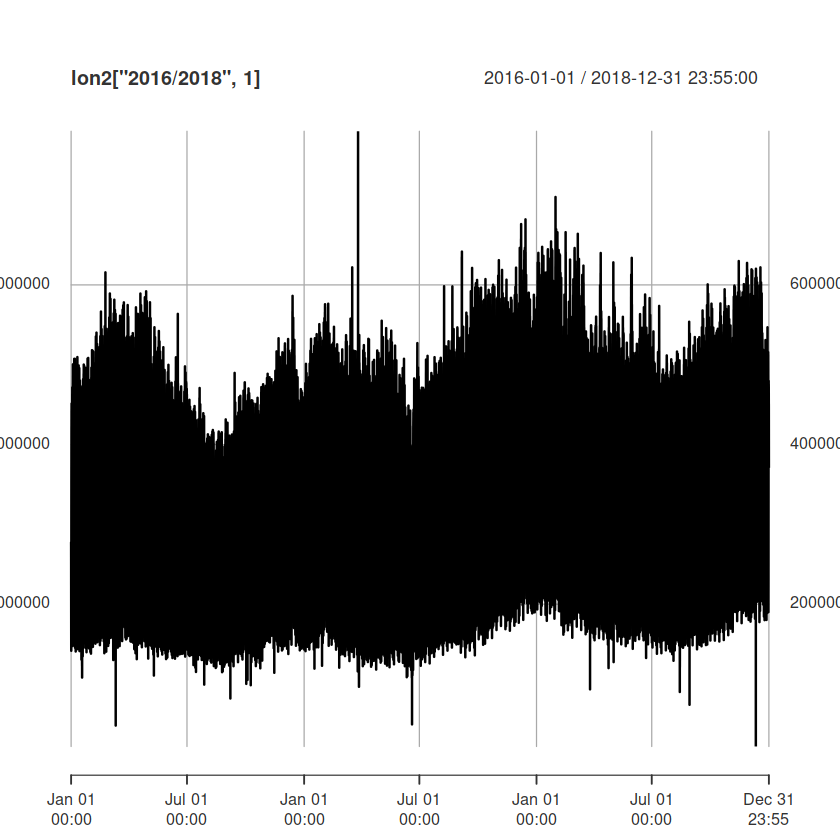

In [159]:
plot(lon2["2016/2018", 1])

In [160]:
x <- linear_interpolate(lon2["2016/2018", ])
indexTZ(x) <- "Europe/London"
#x <- lon2["2018-03-27/2018-04-27"]

In [161]:
nrow(x)

[1] 315648

In [162]:
# clean up x.
# * interpolate gap when clocks move forward.
# * remove 1am-2am and 1am-am duplicate when clocks move back and interpolate.

s1 <- x["/2016-03-27 00:55"]
s2 <- x["2016-03-27 02:00/2016-10-30 00:55"]
s3 <- x["2016-10-30 02:00/2017-03-26 00:55"]
s4 <- x["2017-03-26 02:00/2017-10-29 00:55"]
s5 <- x["2017-10-29 02:00/2018-03-25 00:55"]
s6 <- x["2018-03-25 02:00/2018-10-28 00:55"]
s7 <- x["2018-10-28 02:00/"]

s1 <- data.frame(date=as.Date(index(s1), tz = "Europe/London"), day=weekdays(as.Date(index(s1), tz = "Europe/London")), msm=as.vector(s1$MsM), bw=as.vector(s1$Bandwidth))
s2 <- data.frame(date=as.Date(index(s2), tz = "Europe/London"), day=weekdays(as.Date(index(s2), tz = "Europe/London")), msm=as.vector(s2$MsM), bw=as.vector(s2$Bandwidth))
s3 <- data.frame(date=as.Date(index(s3), tz = "Europe/London"), day=weekdays(as.Date(index(s3), tz = "Europe/London")), msm=as.vector(s3$MsM), bw=as.vector(s3$Bandwidth))
s4 <- data.frame(date=as.Date(index(s4), tz = "Europe/London"), day=weekdays(as.Date(index(s4), tz = "Europe/London")), msm=as.vector(s4$MsM), bw=as.vector(s4$Bandwidth))
s5 <- data.frame(date=as.Date(index(s5), tz = "Europe/London"), day=weekdays(as.Date(index(s5), tz = "Europe/London")), msm=as.vector(s5$MsM), bw=as.vector(s5$Bandwidth))
s6 <- data.frame(date=as.Date(index(s6), tz = "Europe/London"), day=weekdays(as.Date(index(s6), tz = "Europe/London")), msm=as.vector(s6$MsM), bw=as.vector(s6$Bandwidth))
s7 <- data.frame(date=as.Date(index(s7), tz = "Europe/London"), day=weekdays(as.Date(index(s7), tz = "Europe/London")), msm=as.vector(s7$MsM), bw=as.vector(s7$Bandwidth))


m1.2 <- tail(head(data.frame(date=tail(s1$date, 1), day=tail(s1$day, 1), msm=seq(55, 120, 5), bw=seq(tail(s1$bw, 1), head(s2$bw, 1), length.out = 14)), -1), -1)
m2.3 <- tail(head(data.frame(date=tail(s2$date, 1), day=tail(s2$day, 1), msm=seq(55, 120, 5), bw=seq(tail(s2$bw, 1), head(s3$bw, 1), length.out = 14)), -1), -1)
m3.4 <- tail(head(data.frame(date=tail(s3$date, 1), day=tail(s3$day, 1), msm=seq(55, 120, 5), bw=seq(tail(s3$bw, 1), head(s4$bw, 1), length.out = 14)), -1), -1)
m4.5 <- tail(head(data.frame(date=tail(s4$date, 1), day=tail(s4$day, 1), msm=seq(55, 120, 5), bw=seq(tail(s4$bw, 1), head(s5$bw, 1), length.out = 14)), -1), -1)
m5.6 <- tail(head(data.frame(date=tail(s5$date, 1), day=tail(s5$day, 1), msm=seq(55, 120, 5), bw=seq(tail(s5$bw, 1), head(s6$bw, 1), length.out = 14)), -1), -1)
m6.7 <- tail(head(data.frame(date=tail(s6$date, 1), day=tail(s6$day, 1), msm=seq(55, 120, 5), bw=seq(tail(s6$bw, 1), head(s7$bw, 1), length.out = 14)), -1), -1)


#tail(s4)
#4.5
#head(s5)

x.fixed <- rbind(s1, m1.2, s2, m2.3, s3, m3.4, s4, m4.5, s5, m5.6, s6, m6.7, s7)
x.fixed$month <- month(x.fixed$date)
x.fixed$day <- factor(x.fixed$day, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
unique(diff(x.fixed$msm))

[1]     5 -1435

In [163]:
head(x.fixed)

date       day    msm bw           month
1 2016-01-01 Friday  0  275042335230 1    
2 2016-01-01 Friday  5  277258803065 1    
3 2016-01-01 Friday 10  273613453546 1    
4 2016-01-01 Friday 15  275278034771 1    
5 2016-01-01 Friday 20  277512097752 1    
6 2016-01-01 Friday 25  276314243723 1

we want to set window $L$ to be big enough to seperate trend from any periodic components.

## component separation

window size `nrow(x)/2` results in a good separation. components are pretty much isolated `<= F22`. `F6, F7, F8` needs a closer look.


Call:
ssa(x = x.fixed$bw)

Series length: 315648,	Window length: 157824,	SVD method: nutrlan
Special triples:  0

Computed:
Eigenvalues: 50,	Eigenvectors: 50,	Factor vectors: 0

Precached: 0 elementary series (0 MiB)

Overall memory consumption (estimate): 62.62 MiB


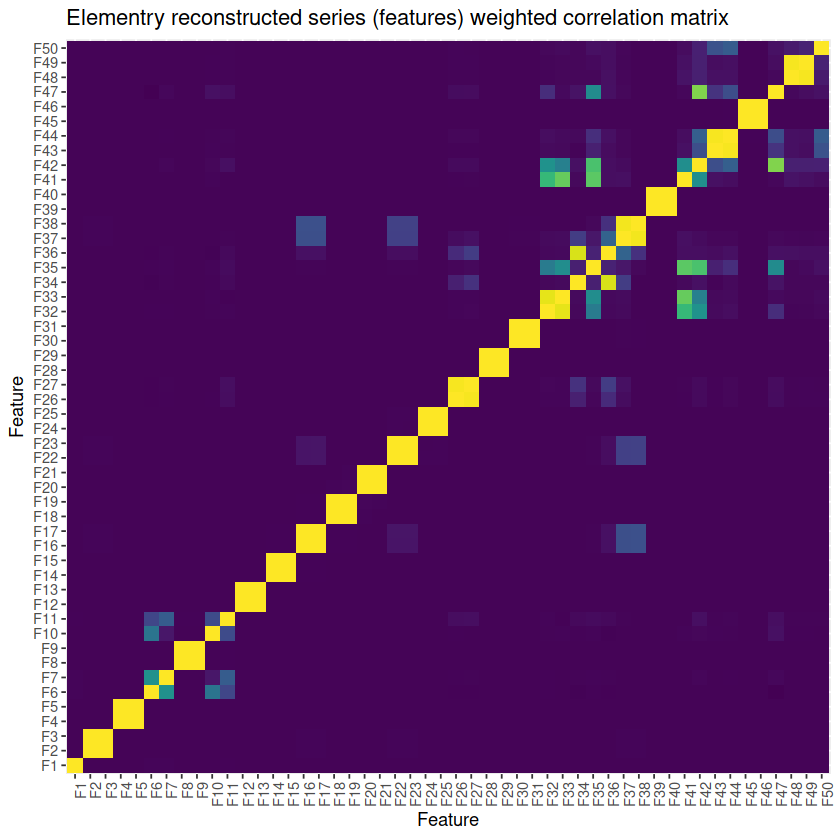

In [164]:
#window <- 288*7
#window <- nrow(x)/2
#s <- ssa(x.fixed$bw, L=288*365)
# kind = “1d-ssa”, “2d-ssa”, “nd-ssa”, “toeplitz-ssa”, “mssa”, “cssa”
s <- ssa(x.fixed$bw)
summary(s)

w <- wcor(s, groups = as.list(1:50))
g <- plot.wcor(w, "viridis")
#g <- g + geom_vline(xintercept=15, color="#ffffff", size=1.5)
#g <- g + geom_hline(yintercept=15, color="#ffffff", size=1.5)
#g <- g + geom_vline(xintercept=31, color="#ffffff", size=0.5)
#g <- g + geom_hline(yintercept=31, color="#ffffff", size=0.5)
g <- g + labs(title="Elementry reconstructed series (features) weighted correlation matrix", x="Feature", y="Feature")
g

In [165]:
if(FALSE){
for(L in 1:365) {
    message(L)
    s <- ssa(x.fixed$bw, L=288*L)
    #png(paste0("/tmp/lala/", sprintf("%02d", L), ".png"))
    w <- wcor(s, groups = as.list(1:50))
    g <- plot.wcor(w, "viridis")
    g <- g + labs(title=paste("L =", L), x="Feature", y="Feature")
    g
    ggsave(paste0("/tmp/lala/", sprintf("%02d", L), ".png"), dpi = 50)
}}

In [166]:
range(w[1:31, 1:31])

[1] -0.001951982  1.000000000

In [167]:
display_html(as.character(kable(w[1:31, 1:31], digits=4, "html")))

F1 
 F2 
 F3 
 F4 
 F5 
 F6 
 F7 
 F8 
 F9 
 F10 
 F11 
 F12 
 F13 
 F14 
 F15 
 F16 
 F17 
 F18 
 F19 
 F20 
 F21 
 F22 
 F23 
 F24 
 F25 
 F26 
 F27 
 F28 
 F29 
 F30 
 F31 
 
 
 
 
 F1 
 1.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0041 
 0.0027 
 0.0000 
 0.0000 
 -0.0008 
 0.0012 
 0 
 0 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0000 
 0.0000 
 
 
 F2 
 0.0000 
 1.0000 
 1.0000 
 0 
 0 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0000 
 0.0000 
 0.0045 
 0.0045 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0044 
 0.0044 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0000 
 0.0000 
 
 
 F3 
 0.0000 
 1.0000 
 1.0000 
 0 
 0 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0000 
 0.0000 
 0.0045 
 0.0045 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0044 
 0.0044 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0000 
 0.0000 
 
 
 F4 
 0.0000 
 0.0000 
 0.0000 
 1 
 1 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0000 
 0.0000 
 
 
 F5 
 0.0000 
 0.0000 
 0.0000 
 1 
 1 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0000 
 0.0000 
 
 
 F6 
 0.0041 
 0.0000 
 0.0000 
 0 
 0 
 1.0000 
 0.4992 
 0.0002 
 0.0000 
 0.3800 
 0.2028 
 0 
 0 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 -0.0020 
 -0.0018 
 0 
 0 
 0.0000 
 0.0000 
 
 
 F7 
 0.0027 
 0.0000 
 0.0000 
 0 
 0 
 0.4992 
 1.0000 
 0.0005 
 0.0004 
 0.0502 
 0.2793 
 0 
 0 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0010 
 0.0018 
 0 
 0 
 0.0000 
 0.0000 
 
 
 F8 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0002 
 0.0005 
 1.0000 
 0.9999 
 0.0002 
 0.0014 
 0 
 0 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0000 
 0.0000 
 
 
 F9 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0000 
 0.0004 
 0.9999 
 1.0000 
 0.0000 
 0.0008 
 0 
 0 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0000 
 0.0000 
 
 
 F10 
 -0.0008 
 0.0000 
 0.0000 
 0 
 0 
 0.3800 
 0.0502 
 0.0002 
 0.0000 
 1.0000 
 0.2194 
 0 
 0 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0016 
 0.0001 
 0 
 0 
 0.0000 
 0.0000 
 
 
 F11 
 0.0012 
 0.0000 
 0.0000 
 0 
 0 
 0.2028 
 0.2793 
 0.0014 
 0.0008 
 0.2194 
 1.0000 
 0 
 0 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0002 
 0.0002 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0239 
 0.0277 
 0 
 0 
 0.0000 
 0.0000 
 
 
 F12 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 1 
 1 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0000 
 0.0000 
 
 
 F13 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 1 
 1 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0000 
 0.0000 
 
 
 F14 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 1.0000 
 1.0000 
 0.0007 
 0.0009 
 0.0002 
 0.0002 
 0.0000 
 0.0000 
 0.0001 
 0.0001 
 0.0002 
 0.0002 
 0.0000 
 0.0000 
 0 
 0 
 0.0000 
 0.0000 
 
 
 F15 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0.0000 
 0 
 0 
 1.0000 
 1.0000 
 0.0009 
 0.0011 
 0.0002 
 0.0002 
 0.0000 
 0.0000 
 0.0001 
 0.0001 
 0

group F6 + F8. F6+F8 have higher correlation than F6+F7 or F7+F8.
can not go beyond F5 before things get a bit messy. F6,7,8 correspond to trend components, although F6 seems to be low-frequency periodic with amplitude modulation. F6 most likely slow moving yearly cycle (more activity in winter)

hierarchical clustering of the $1 - p_ij^(w)$ w-correlation matrix to automatically extract these groupings. see [ssa book](https://www.researchgate.net/profile/Nina_Golyandina/publication/260124592_Singular_Spectrum_Analysis_for_Time_Series/links/02e7e52fa7e34da379000000/Singular-Spectrum-Analysis-for-Time-Series.pdf)

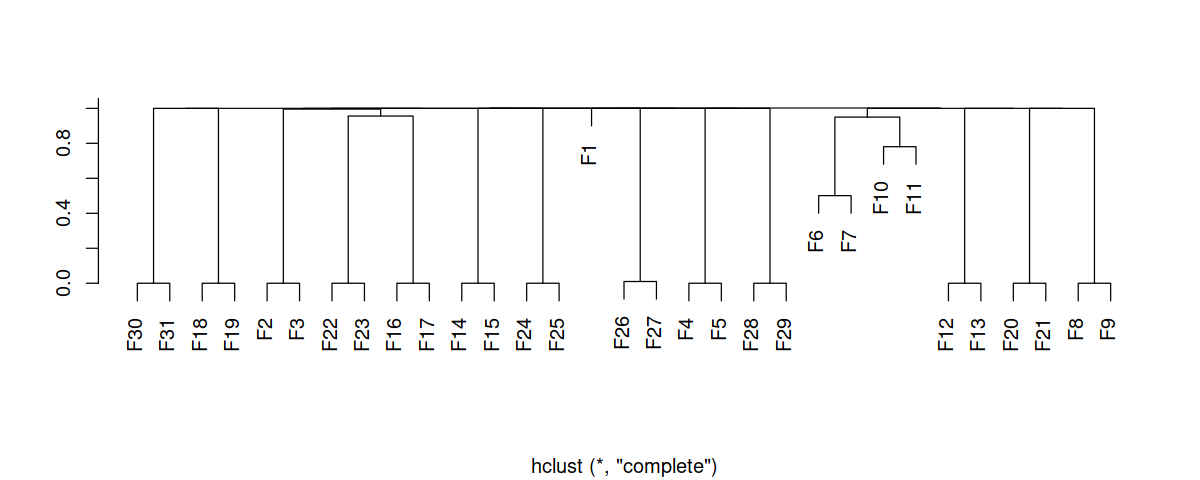

In [195]:
options(repr.plot.width=10, repr.plot.height=4)
plot(hclust(1 - as.dist(w[1:31, 1:31]), method = "complete"), ylab = "", xlab="", main="", bty="n")

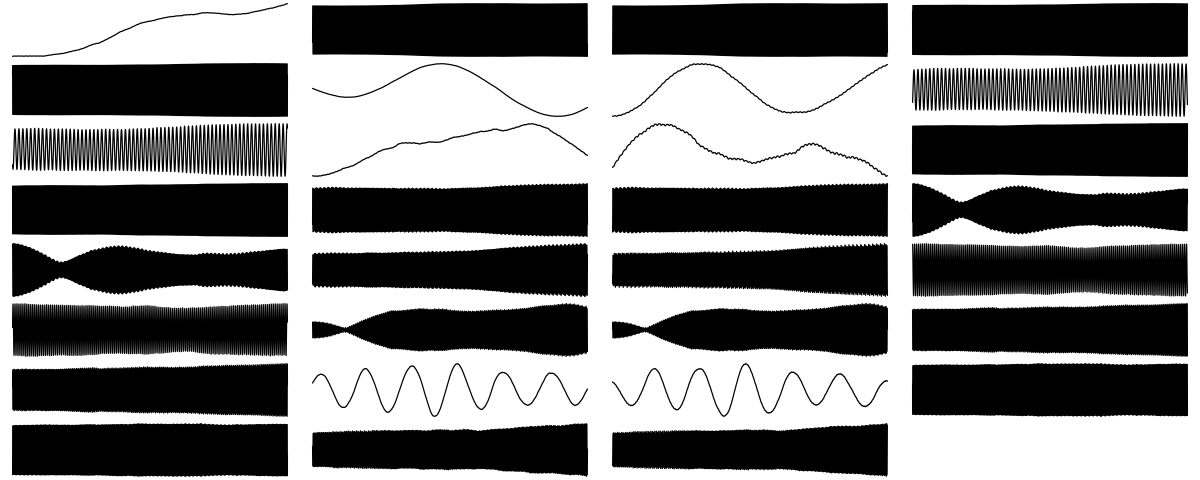

In [196]:
plot.eigenvectors(s, group=1:31, zoom=0)

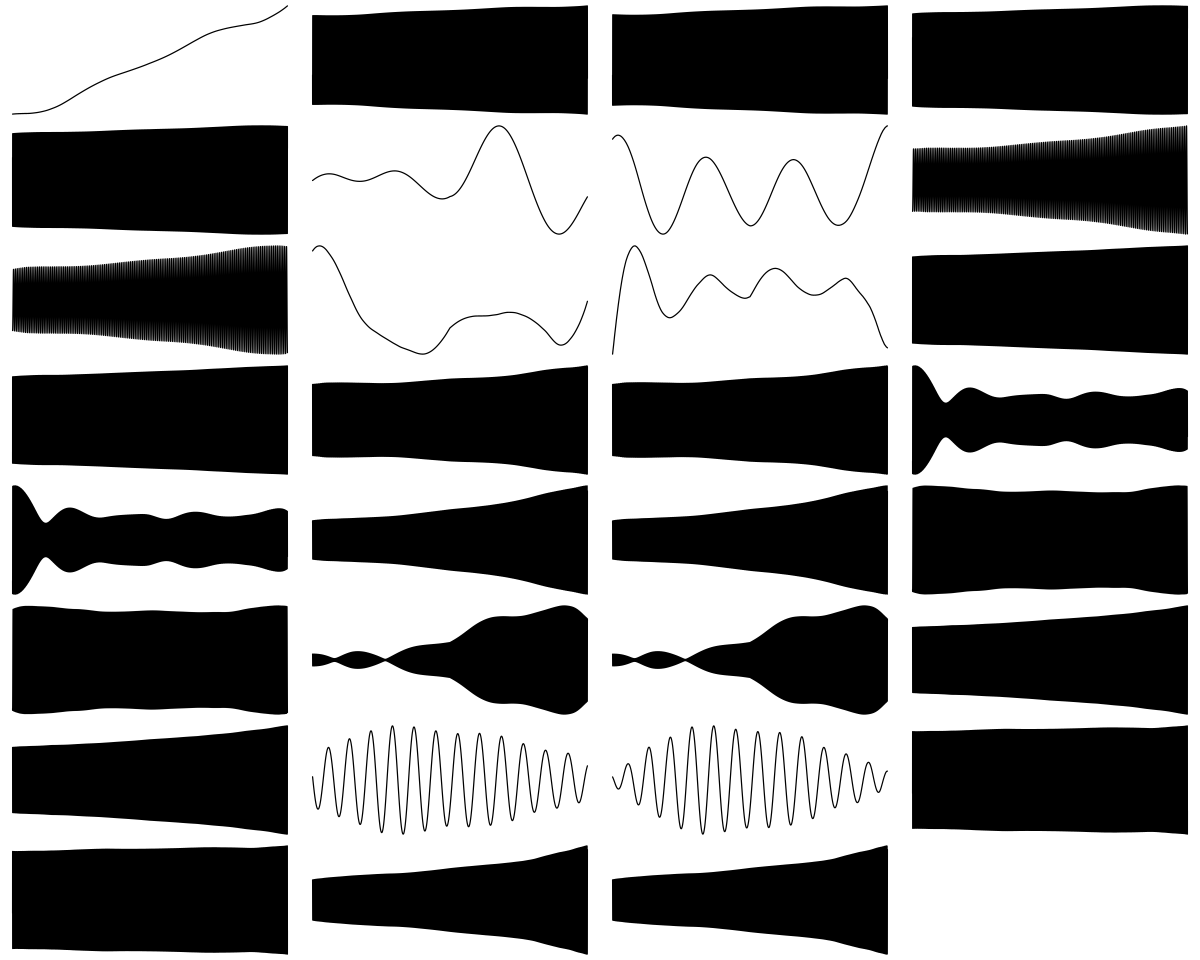

In [203]:
options(repr.plot.width=10, repr.plot.height=8)
plot.reconstructed(s, group=1:31, zoom=0)

scatter plots of eiginvector pairs `(2,3)`, `(4,5)`, `(9,10)` shows harmonic series

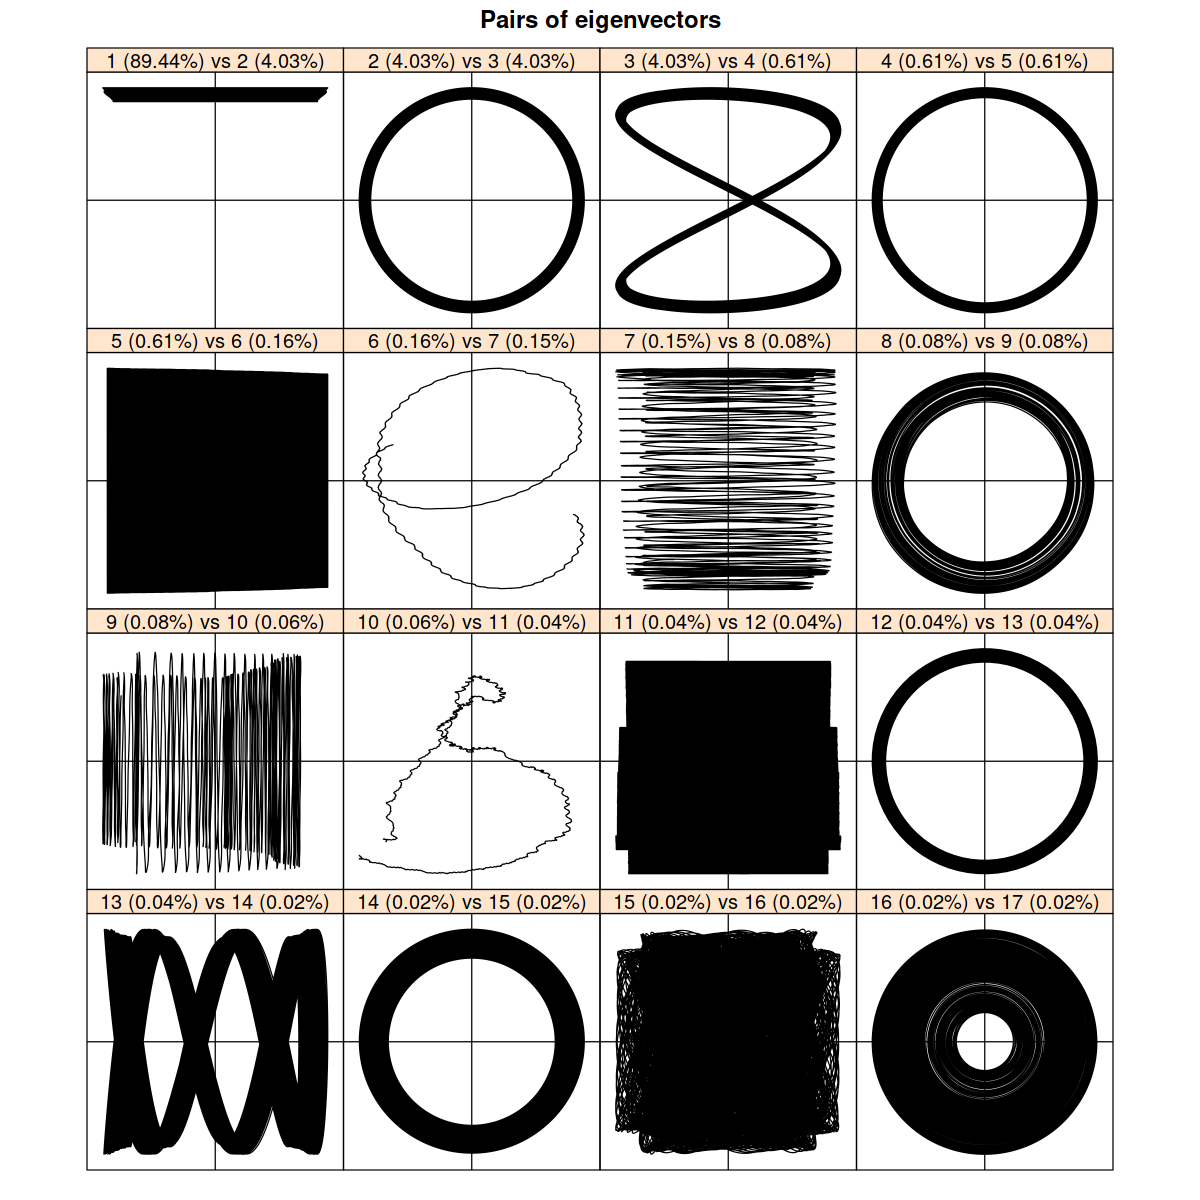

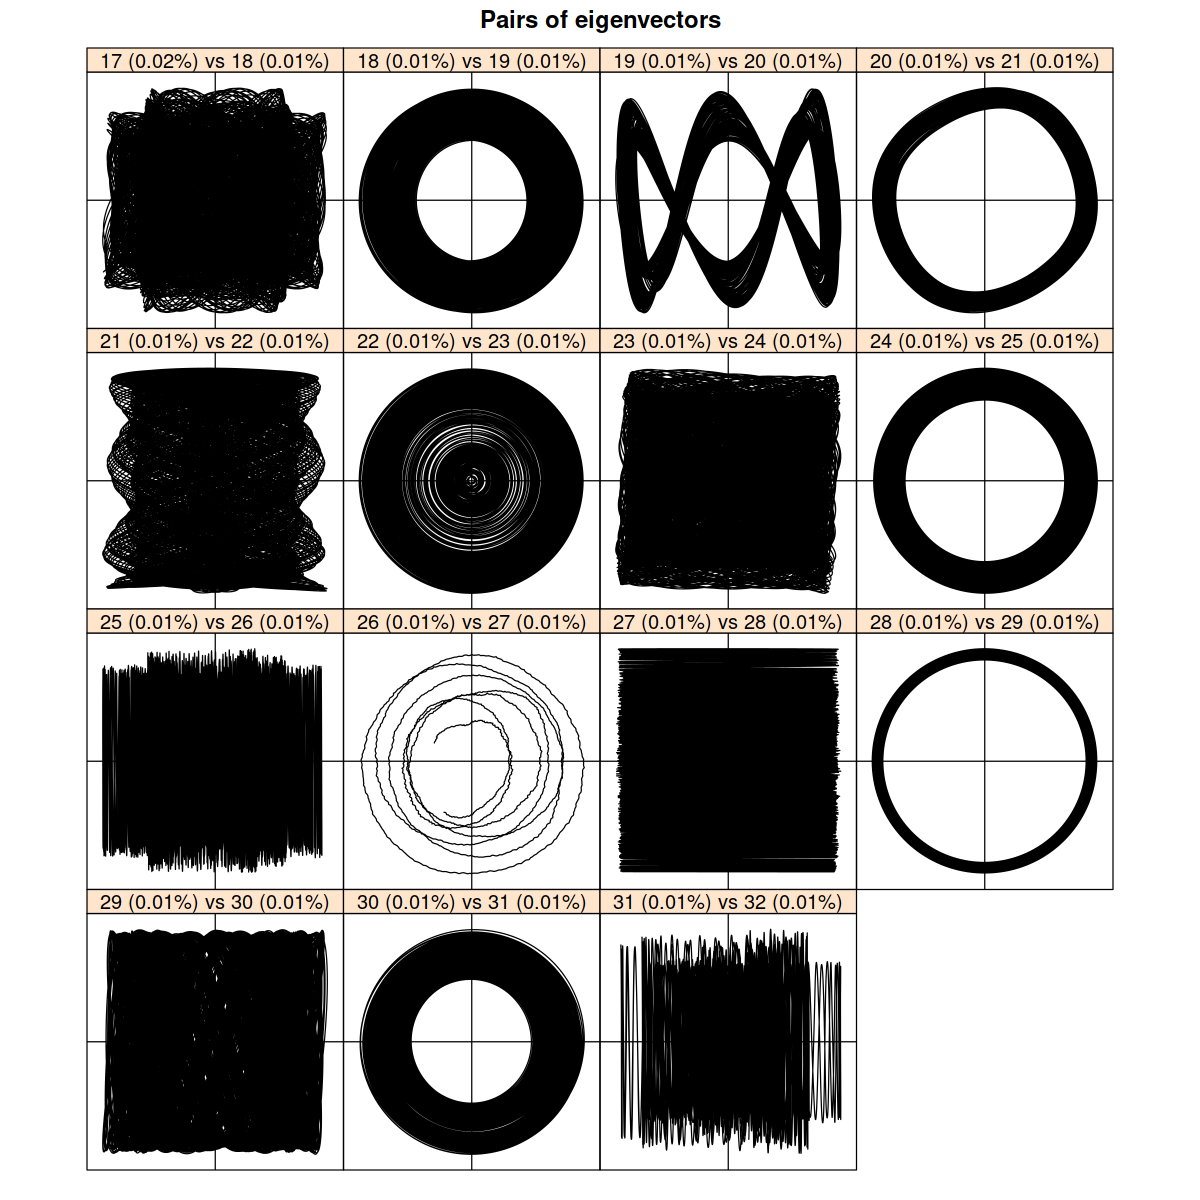

In [207]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(2,1))
plot(s, type="paired", col="black", idx=1:16)
plot(s, type="paired", col="black", idx=17:31)

this suggests 2 groupings: `F2, F3` and `F4 F5`:

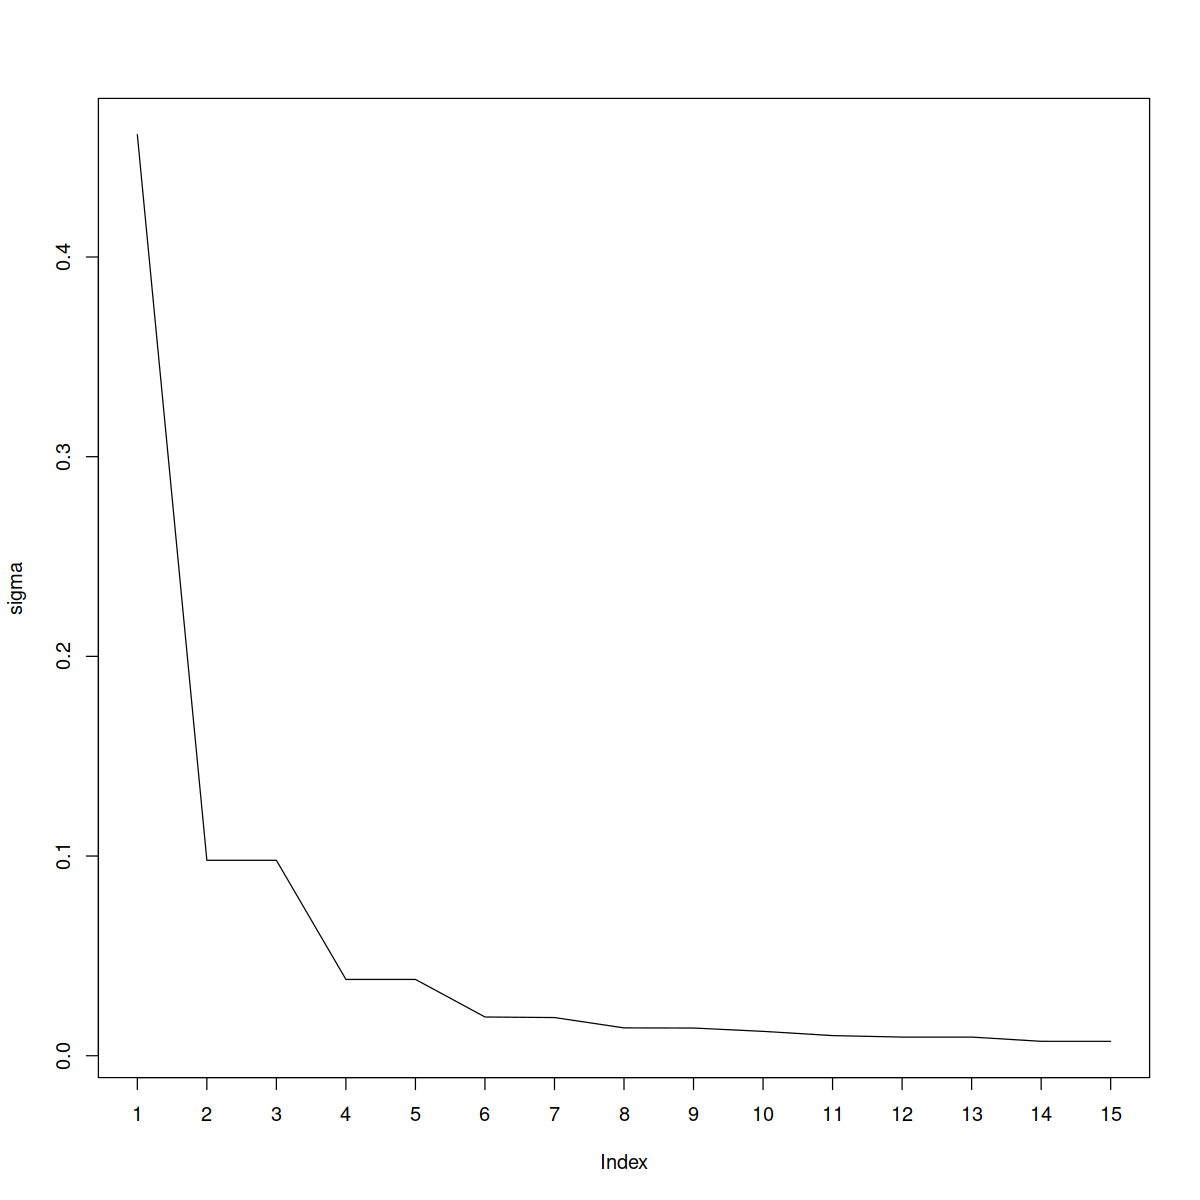

In [208]:
plot.component.norms(s, 15)

In [209]:
s$sigma / sum(s$sigma)

[1] 0.461262478 0.097871148 0.097866559 0.038219142 0.038218527 0.019398843
 [7] 0.019115575 0.013930141 0.013867951 0.012202652 0.010074173 0.009337285
[13] 0.009337122 0.007211849 0.007208169 0.006616542 0.006616235 0.005807954
[19] 0.005804033 0.005746757 0.005741244 0.005035581 0.005034507 0.004937716
[25] 0.004936198 0.004664698 0.004592195 0.004185516 0.004184972 0.004014101
[31] 0.004012028 0.003839763 0.003831867 0.003588719 0.003583386 0.003495656
[37] 0.003491967 0.003489482 0.003445701 0.003445640 0.003384710 0.003294263
[43] 0.003091179 0.003082661 0.003060845 0.003060670 0.003029181 0.002961683
[49] 0.002933307 0.002837430

## trend analysis/extraction

trend is any "slow moving component. we can use number of zero crossings or kendall's test to verify this is the case. (see [book](https://www.researchgate.net/profile/Nina_Golyandina/publication/260124592_Singular_Spectrum_Analysis_for_Time_Series/links/02e7e52fa7e34da379000000/Singular-Spectrum-Analysis-for-Time-Series.pdf)).

Warning message:
“timezone of object (Europe/London) is different than current timezone ().”

                          t1        t2    combo
2016-01-01 00:00:00 321.9008 -4.118290 317.7825
2016-01-01 00:05:00 321.9011 -4.111040 317.7900
2016-01-01 00:10:00 321.9013 -4.103952 317.7974
2016-01-01 00:15:00 321.9015 -4.096924 317.8046
2016-01-01 00:20:00 321.9017 -4.090046 317.8117
2016-01-01 00:25:00 321.9019 -4.083373 317.8186

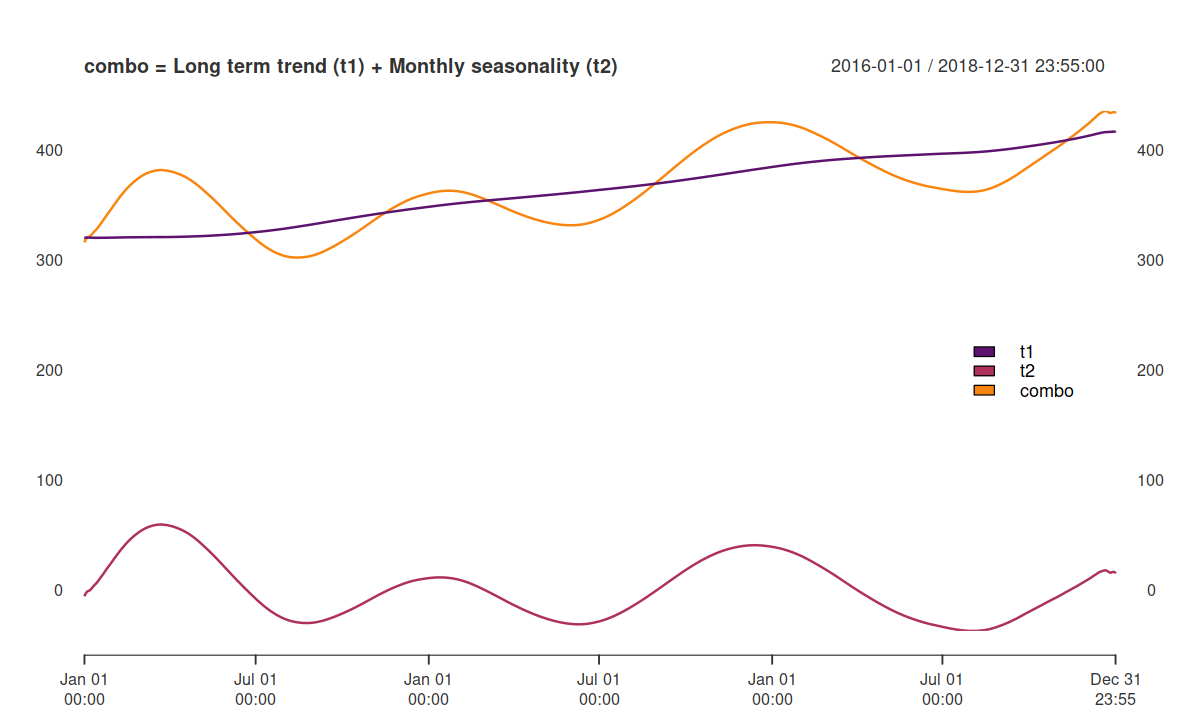

In [272]:
options(repr.plot.width=10, repr.plot.height=6)
# consider components in isolation, then grouping with and without F6 which looks more like a
# low frequency periodic component. 
#trend <- xts.reconstruct(s, list(t1=1, t6=c(1, 6), t7=c(1, 7), t8=c(1, 8), combo1=c(1, 6, 7, 8), combo2=c(1, 7, 8)))
trend <- xts.reconstruct(s, list(t1=1, t2=c(6, 7, 10, 11), combo=c(1, 6, 7, 10, 11)))
trend <- trend*10^-9 # gigabits per second
head(trend)
# note that grouping can be done post reconstruction by just summing elemetry components together:
#trend.xts[, c(2, 3, 4)] <- as.vector(trend.xts[, 1]) + trend.xts[, c(2, 3, 4)]
#head(trend.xts)
plot.xts(trend, legend.loc="right",  grid.col = NA, col=c("#5d126e", "#ae305c", "#f8850f"), main="combo = Long term trend (t1) + Monthly seasonality (t2)")

trend components (without T1)
`T6` follows a periodic cycle, climbing in the winter months, falling in the summer. This component most likely represents the lowest-frequency periodic component of the series: it makes sense that internet use is higher in winter months when taking into account weather seasonality, summer vacations and available daylight hours. With the maximum window $N/2$ it is very difficult to seperate this periodic component from the trend `T1, T7, T8`. `T7, T8` are less periodic than `T6`, although both share the same frequency as `T6`. Since it is difficult to separate trend in this case, we group them all together and accept that the trend in combination with `T1` contains this low frequency component. It may be possible to separate this component with more data points or by using a "sequential SSA".

grouping trend as `T1,T6,T7,T8`, can now consider the periodic components. the hierarchical cliustering of the wcorr matrix suggests 9 pairs which we define here along with a grouping of pairs. e.g.,, `c8_b` corresponds to cyclic pair `8`, sub-cluster `B`.

In [211]:
#r <- xts.reconstruct(s, list(t1=c(1, 6, 7, 8), 
#                             c1_a=c(2, 3), c2_b=c(4, 5), c3_d=c(9, 10), c4_a=c(11, 12), c5_a=c(13, 14), 
#                             c6_d=c(15, 16), c7_c=c(17, 18), c8_b=c(19, 20), c9_c=c(21, 22)))
# 6,7 = year cycle (c2)
# c7, c8, c9 = problematic: mixed with high frequencies.
#groups <- list(t=1, c1=c(2, 3), c2=c(4, 5), c3=c(6, 7), c4=c(8, 9), c5=c(10, 11), 
#                    c6=c(12, 13), c7=c(14, 15), c8=c(16, 17), c9=c(18, 19), c10=c(20,21), c11=c(22,23))
groups <- list(t=1, c1=c(2, 3), c2=c(4, 5), c3=c(6, 7, 10, 11), c4=c(8, 9), c5=c(12, 13), 
                    c6=c(14, 15),
                    c7=c(16,17), c8=c(18,19), c9=c(22,23), c10=c(24,25), c11=c(28,29), c12=c(30,31), c13=c(20,21))
r <- xts.reconstruct(s, groups)
r.raw <- reconstruct(s, groups)
r$orig <- x

at weekly level (a sunday to a saturday), 2 the lowest frequency pair `9, 10` corresponds to the weekly drop in activity at weekends and mid-week peak. the lowest point being the early hours of saturday morning, peak = wednesday. the next low-frequency pair `21, 22` (c9_c) is correlated with c3_d except for wednesdays. adding these 2 pairs together results in a cycle in which wednesday activity is reduced, leaving peaks on tuesday + thursday.

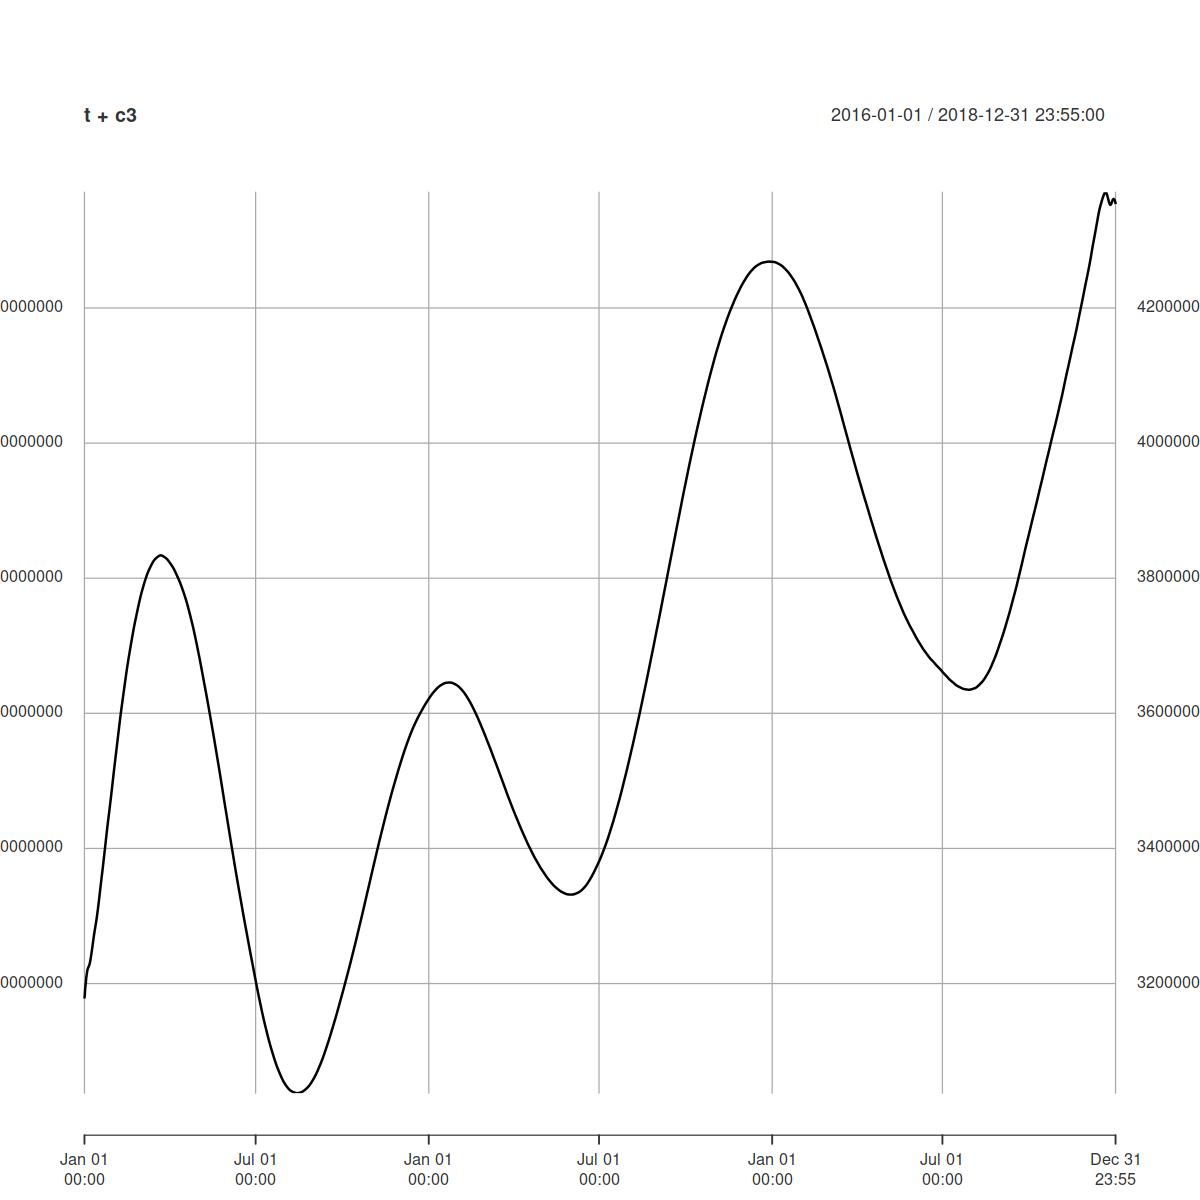

In [212]:
with(r, {
    plot(t + c3)
    lines(orig, col="red")
})

the next pair is 2, 3 which describes the overall daily cycle. this is the most dominant of the periodic components. combining the trend with the weekly and main daily component yields the following series. the wednesday dip from the `21, 22` (c9_c) component has the effect of flattening the mid week peak such that tuesday, wednesday and thursday are more or less equal.

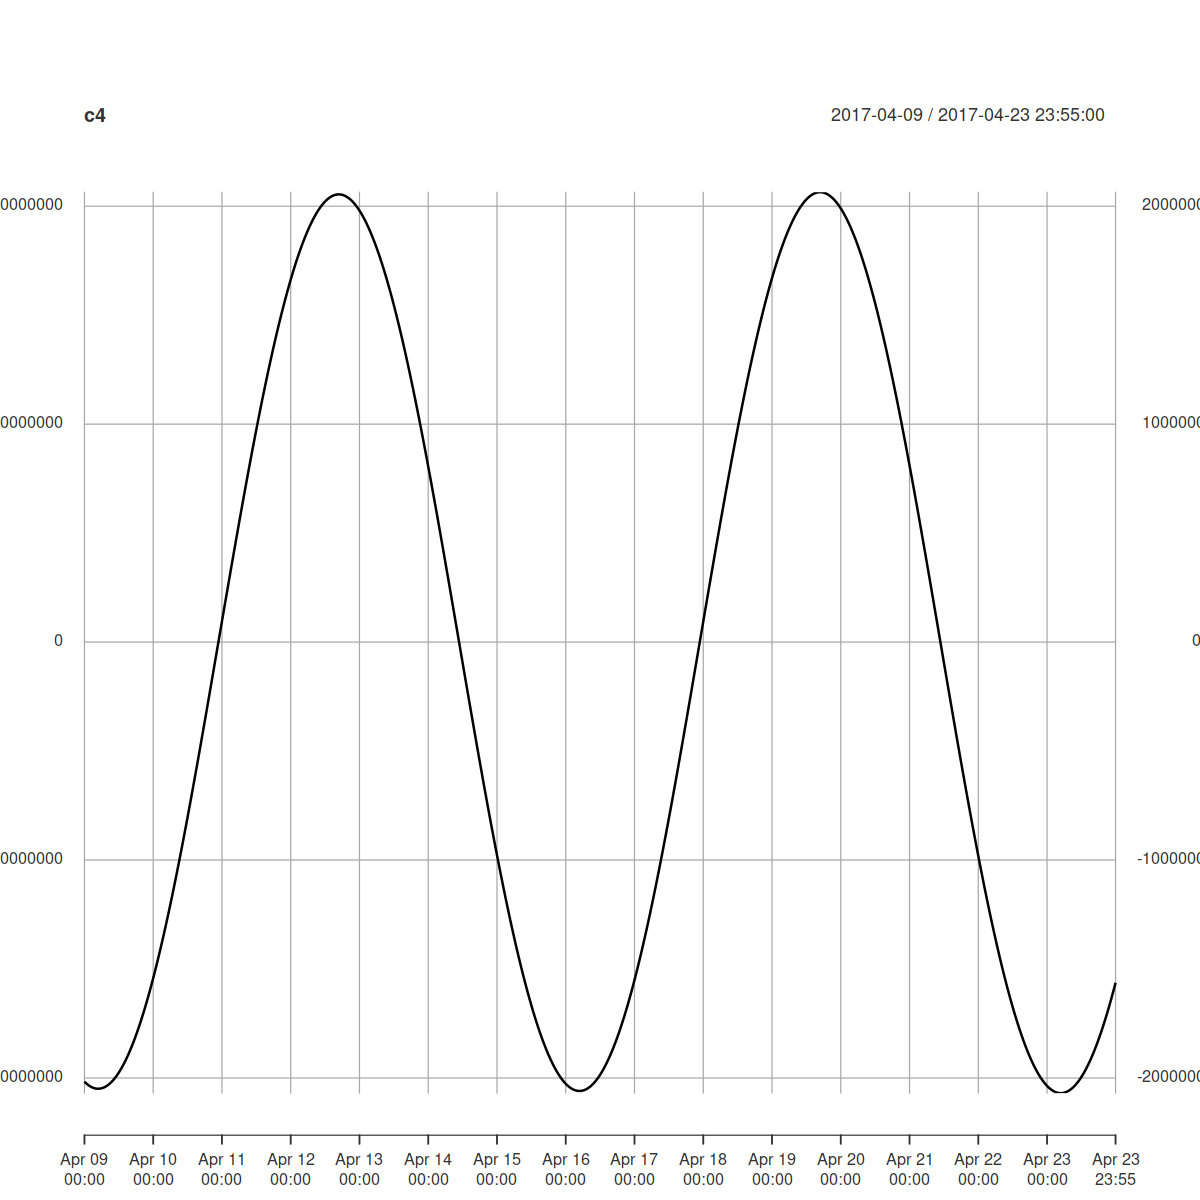

In [213]:
# mid week + slight drop off wednesday
with(r["2017-04-09/2017-04-23"], { # sun : sun
    plot(c4)
   
   
    #lines(c4+c9, col="blue")
    #lines(c4+c10, col="blue")
})

In [296]:
r[, 1:15] <- r[, 1:15] * 10^-9 

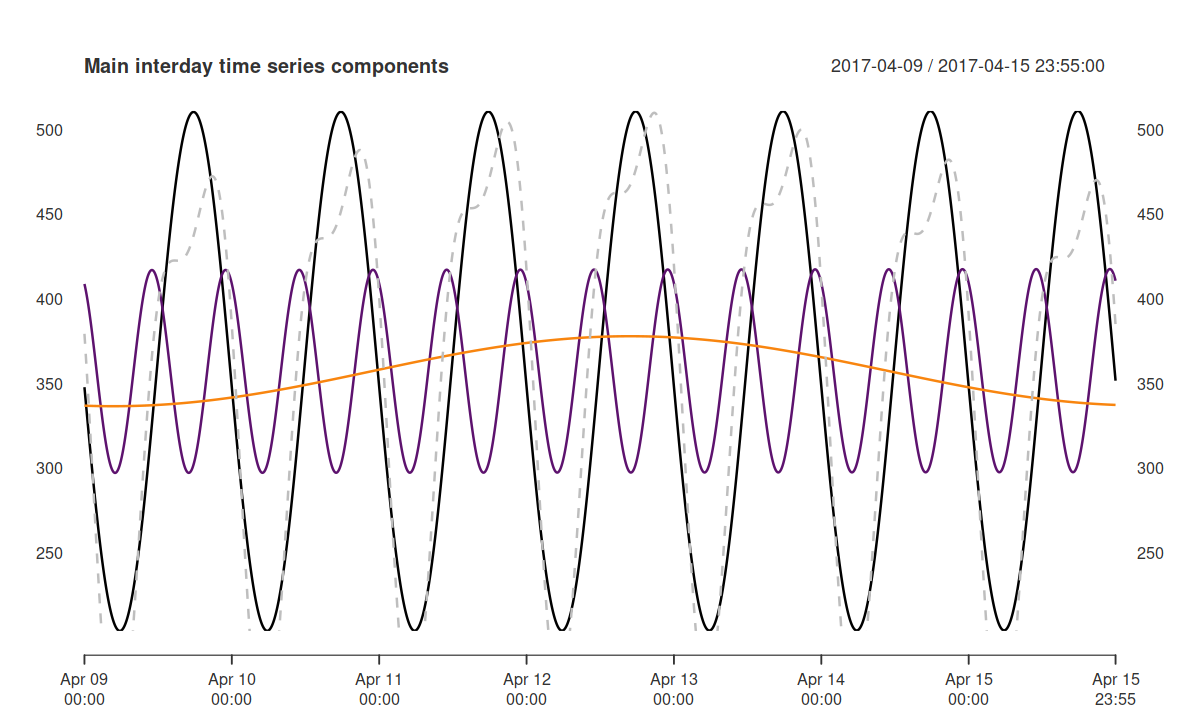

In [321]:
# 2 days, all components
#with(r["2017-04-09/2017-04-10"], { # sun : mon
with(r["2017-04-09/2017-04-15"], { # sun : sat
    plot(t+c1, col="black", grid.col = NA, lwd=2, main="Main interday time series components") # main daily wave
    lines(t+c2, col="#5d126e", lwd=2) # evening peak.
    
    
    #lines(t+c3, col="#ae305c") # winter/summer slow cycle
    lines(t+c4, col="#f8850f", lwd=2) # mid week peak
    
   
    #lines(t+c5, col="#ae305c", lwd=2) # highest frequency component: adds in a lunchtime peak
        
    # slow wave stuff.
    #lines(t+c6, col="red") # pushes evening peak higher.
    #lines(t+c7, col="grey") 
    #lines(t+c8, col="grey")
    #lines(t+c9, col="grey")
    #lines(t+c10, col="grey")
    #lines(t+c11, col="grey")
    #lines(t+c12, col="grey")
    #lines(t+c13, col="grey")
    
    
    
    #lines(t+c1+c2+c5+c6, col="orange",lwd=3)
    lines(t+c1+c2+c4, col="grey",lwd=2, lty=2)
})


having established the weekly and overall daily periods, we next consider intra-day components.

of these, c2_b (4,5) is the most significant pair. the frequency of c2_b is in line with morning and evening periods. adding to c1_a results in a series showing the morning and evening peaks. adding the higher frequency components `c5_a+c6_d+c7_c+c8_b` results in a closer fit in which the pre evening dip is accounted for by `c6_d`

combine them all

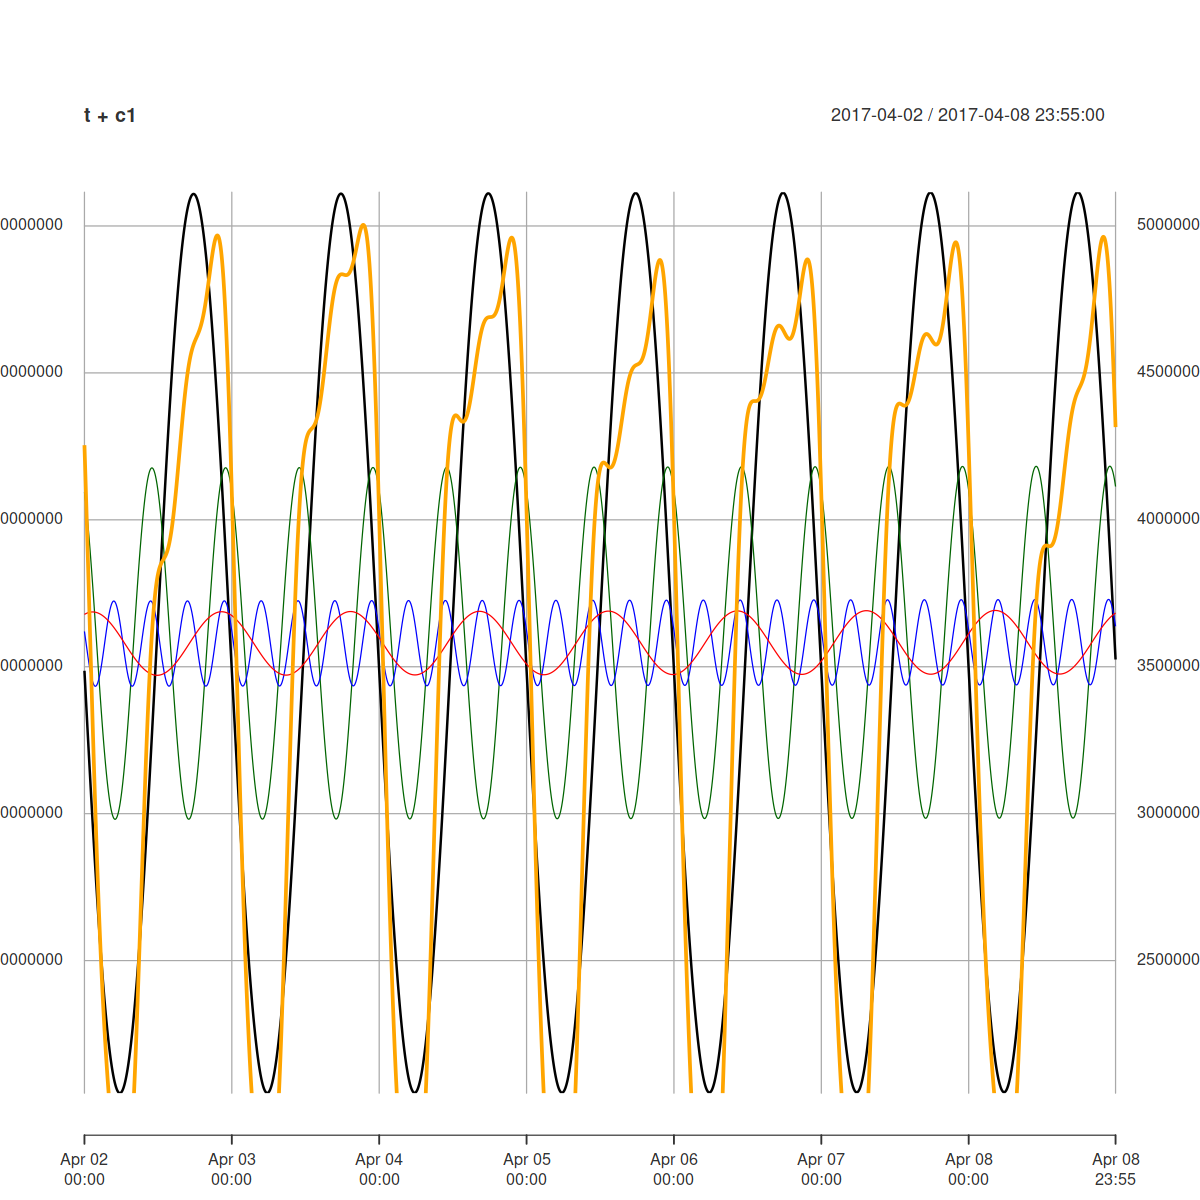

In [215]:
# whole week, all components

with(r["2017-04-02/2017-04-08"], { # sun : mon
    plot(t+c1) # main daily wave
    lines(t+c2, col="darkgreen") # evening peak.
    
   
    lines(t+c5, col="blue") # lunch time peak
    lines(t+c6, col="red") # pushes evening peak higher.
    
    lines(t+c1+c2+c5+c6   + c7+c8+c9+c10+c11+c12+c13, col="orange",lwd=3)
    #lines(t+c1+c5+c2+c6+c7+c8+c9+c11, col="orange",lwd=3)
})

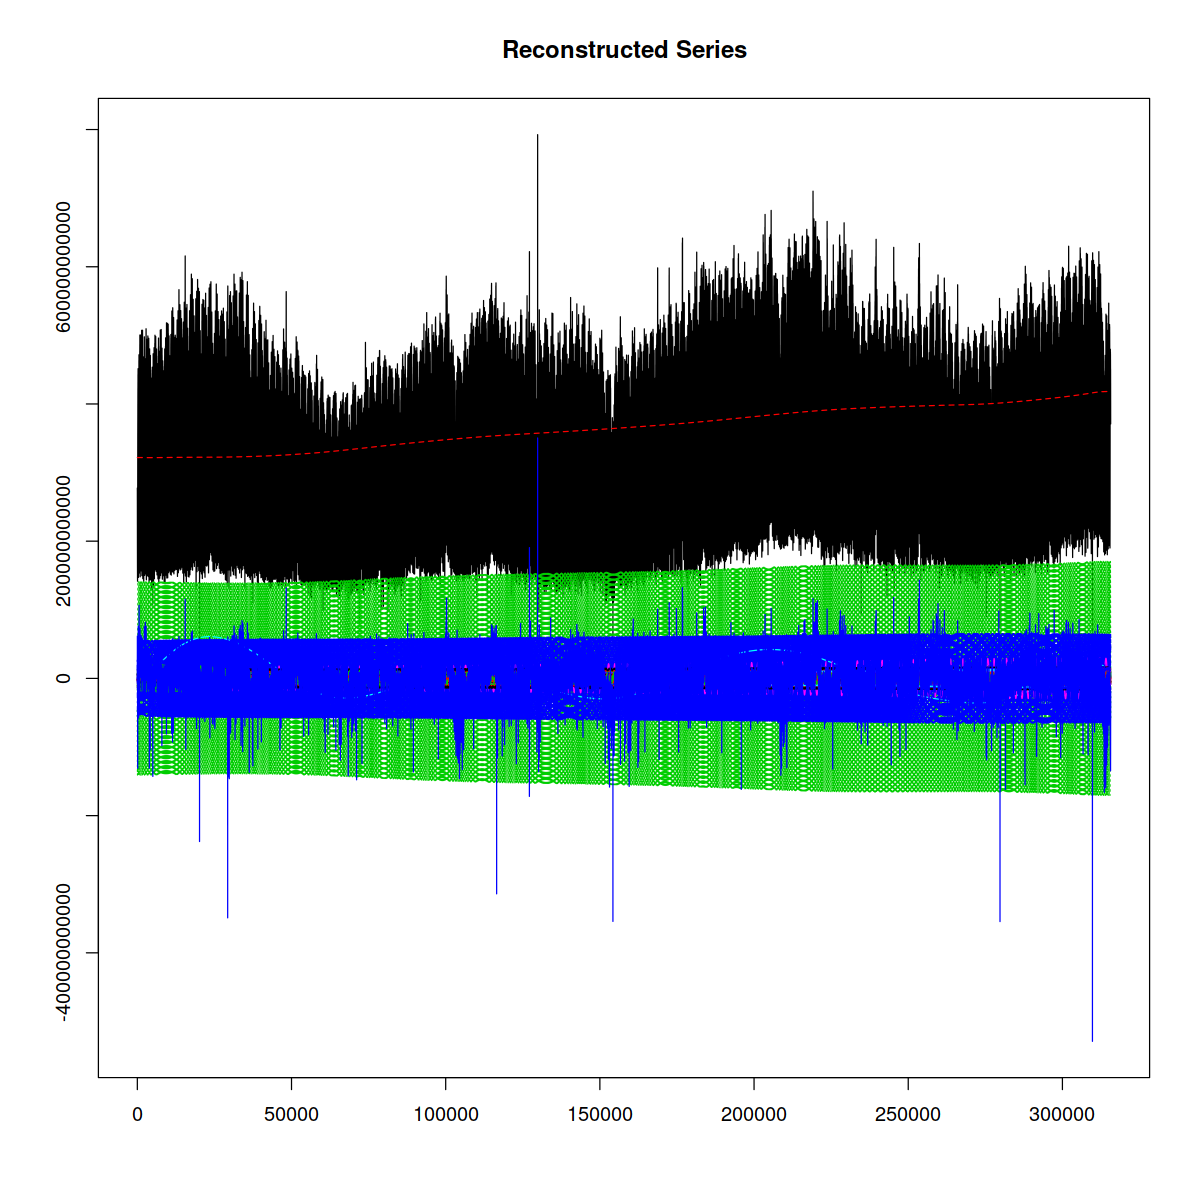

In [216]:
plot(r.raw)

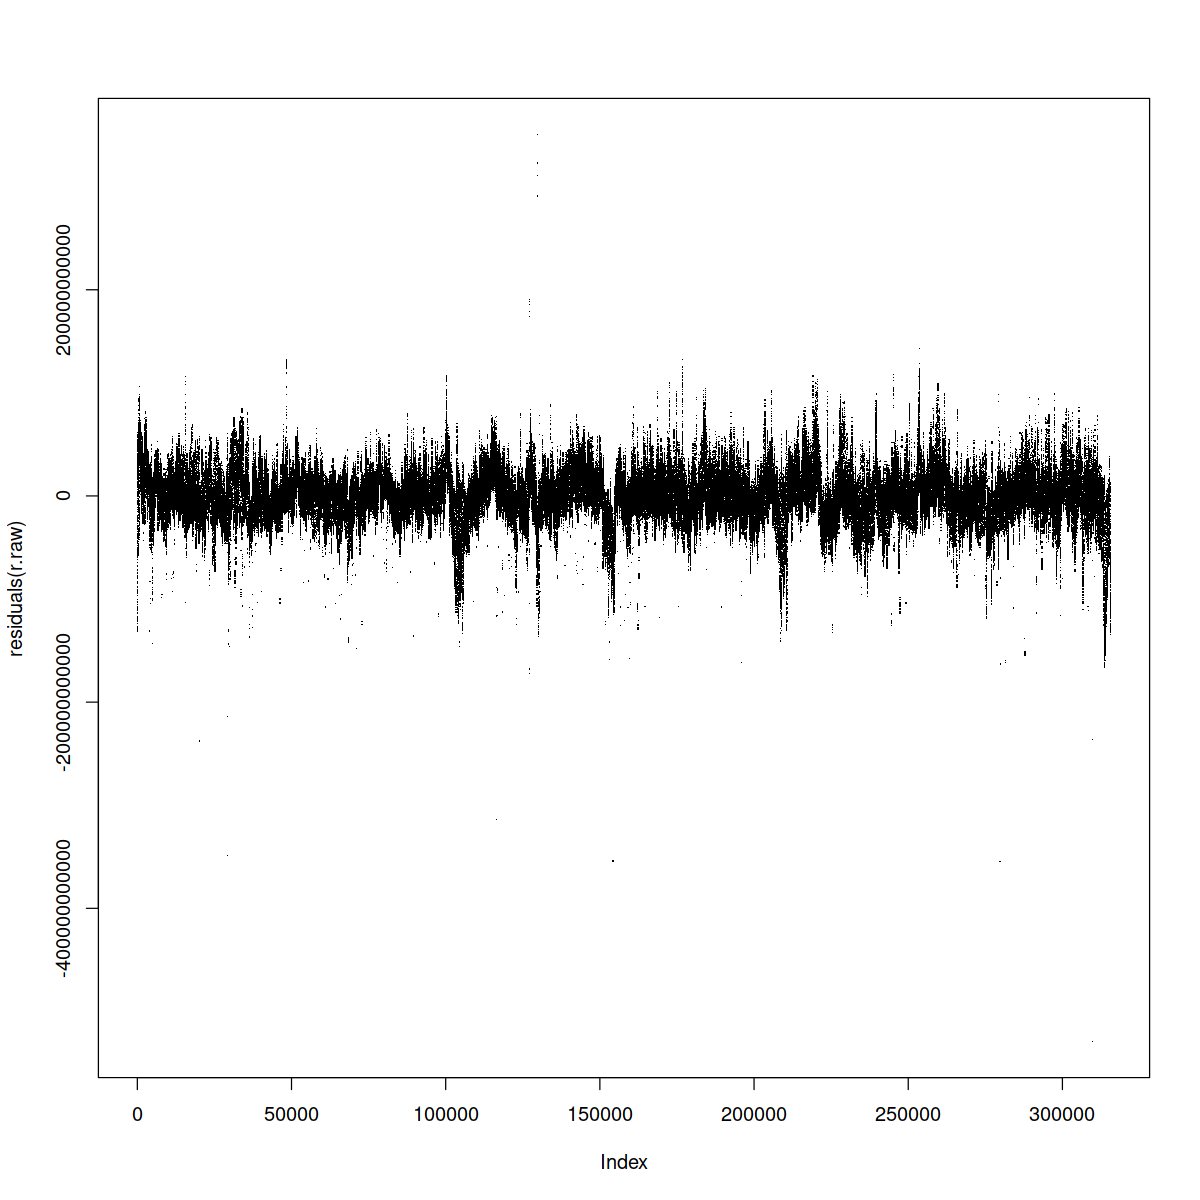

In [217]:
plot(residuals(r.raw), pch=".")

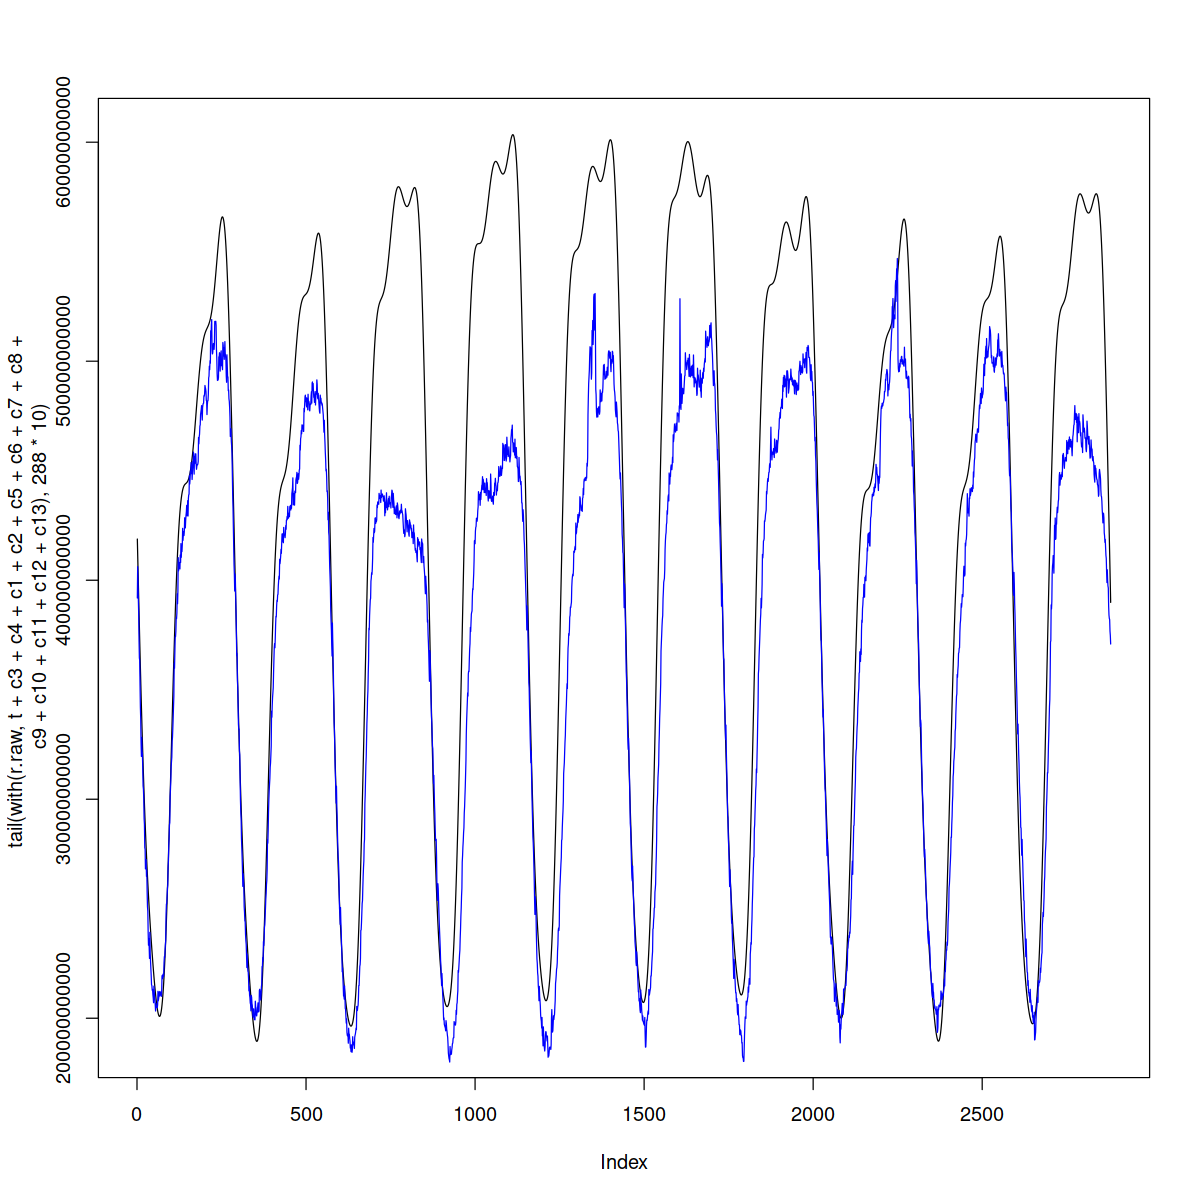

In [218]:
# xmas (24,25th - 3rd + 4th) clearly visible here: drop off (blue) from model
# +   c6+c7+c8+c10
plot(tail(with(r.raw, t + c3 + c4 + c1+c2+c5+c6     + c7+c8+c9+c10+c11+c12+c13), 288*10), type="l")
#par(new=T)
lines(tail(x.fixed$bw, 288*10), type="l", col="blue")

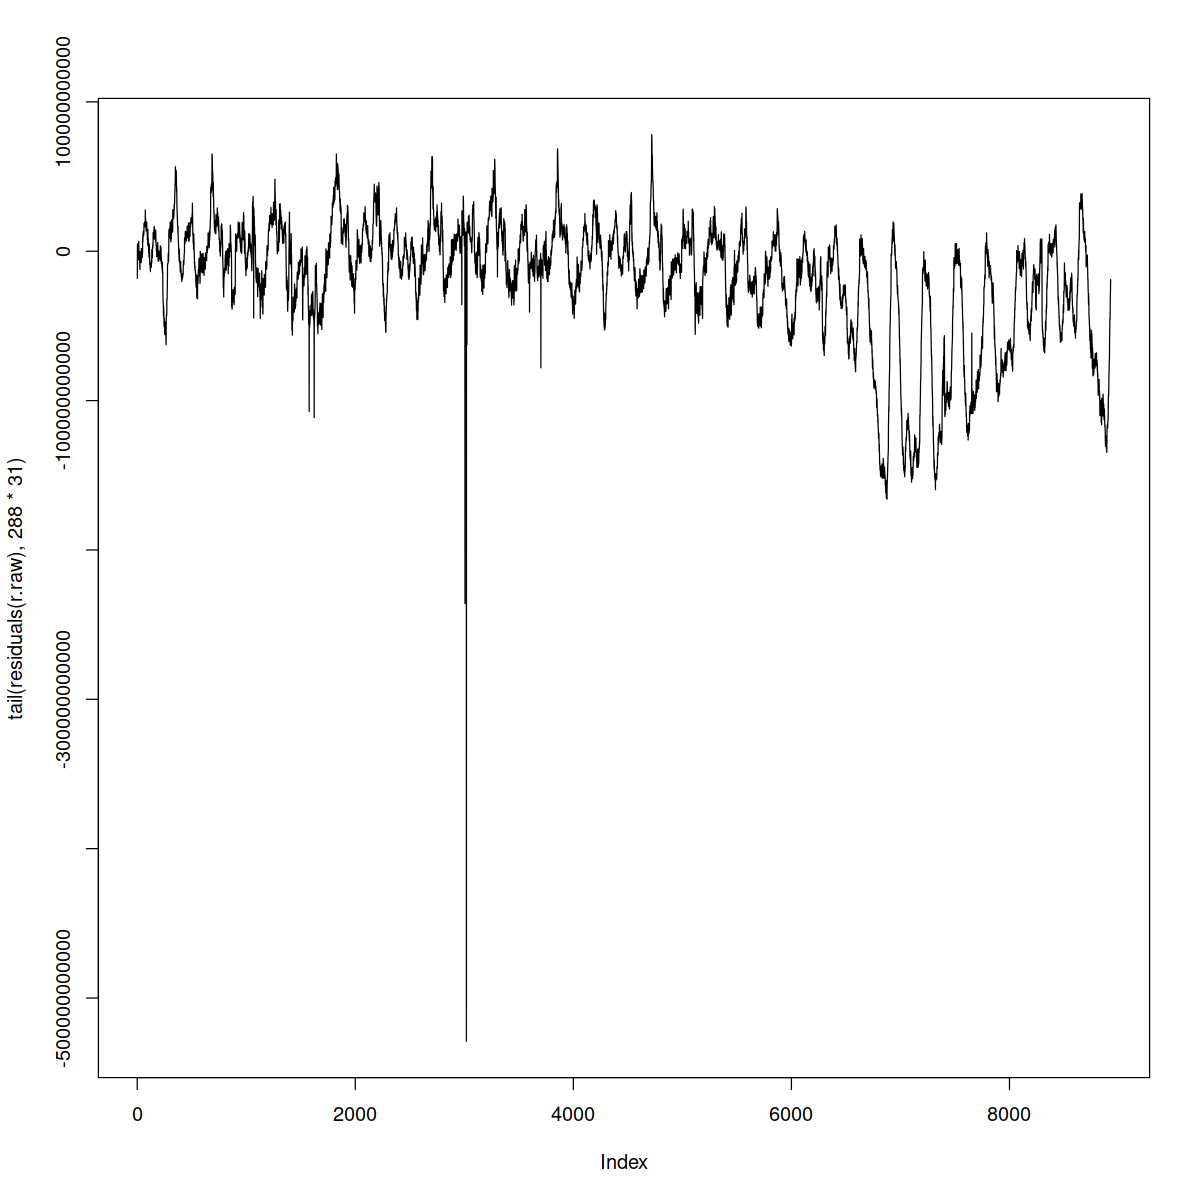

In [219]:
# xmas visible in monthly residuals (+ an anomaly)
plot(tail(residuals(r.raw), 288*31), type="l")
#par(new=T)
#plot(tail(x.fixed$bw, 288*10), type="l", col="blue")

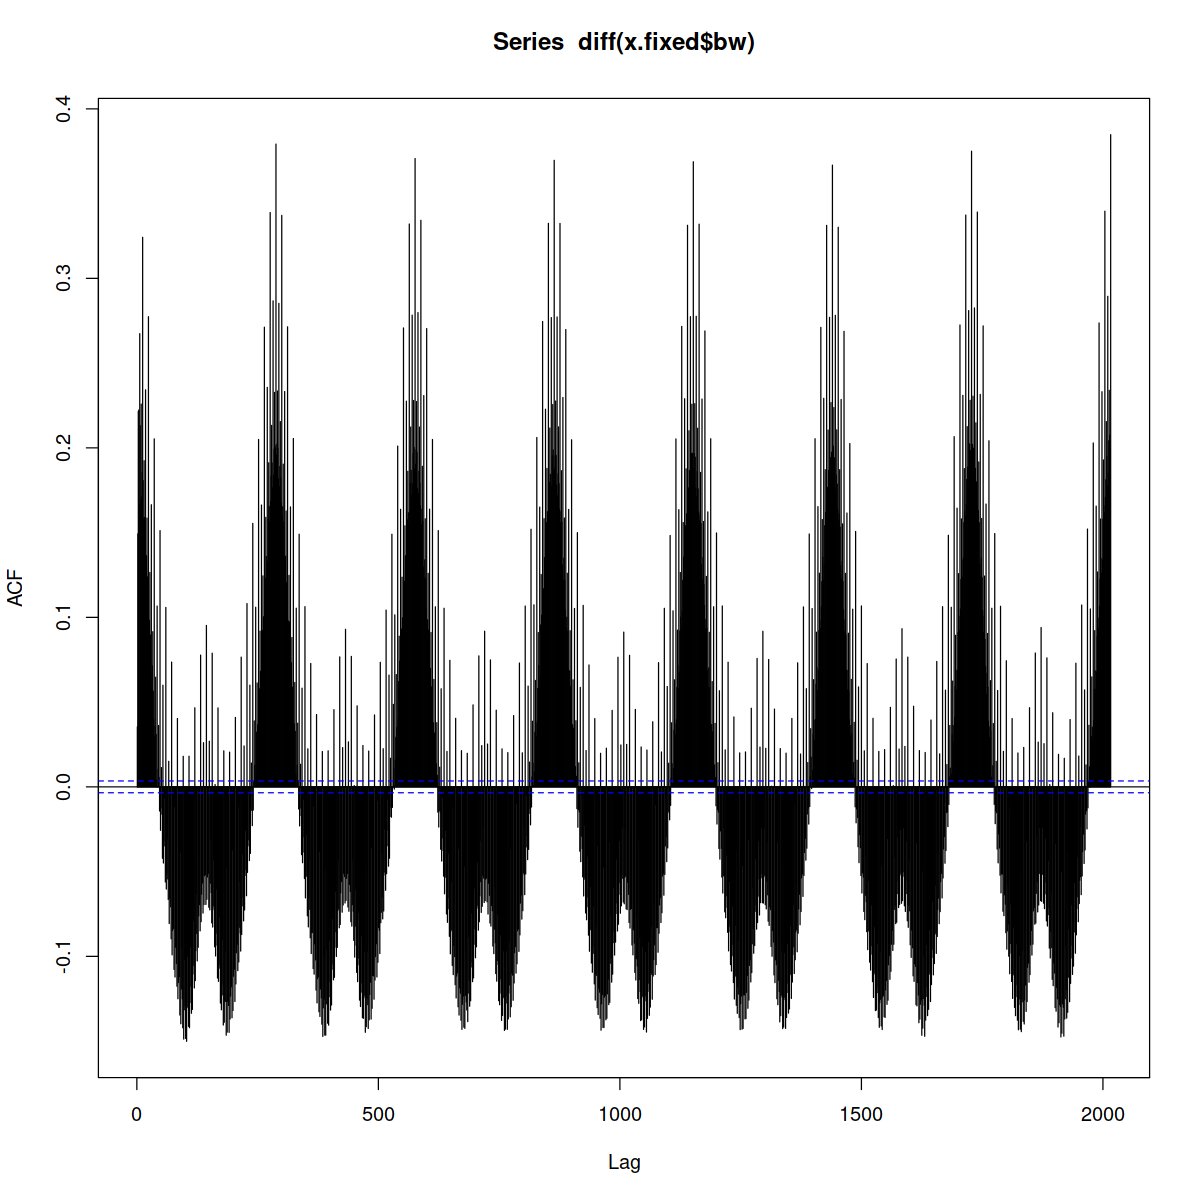

In [220]:
Acf(diff(x.fixed$bw), lag.max = 288*7)

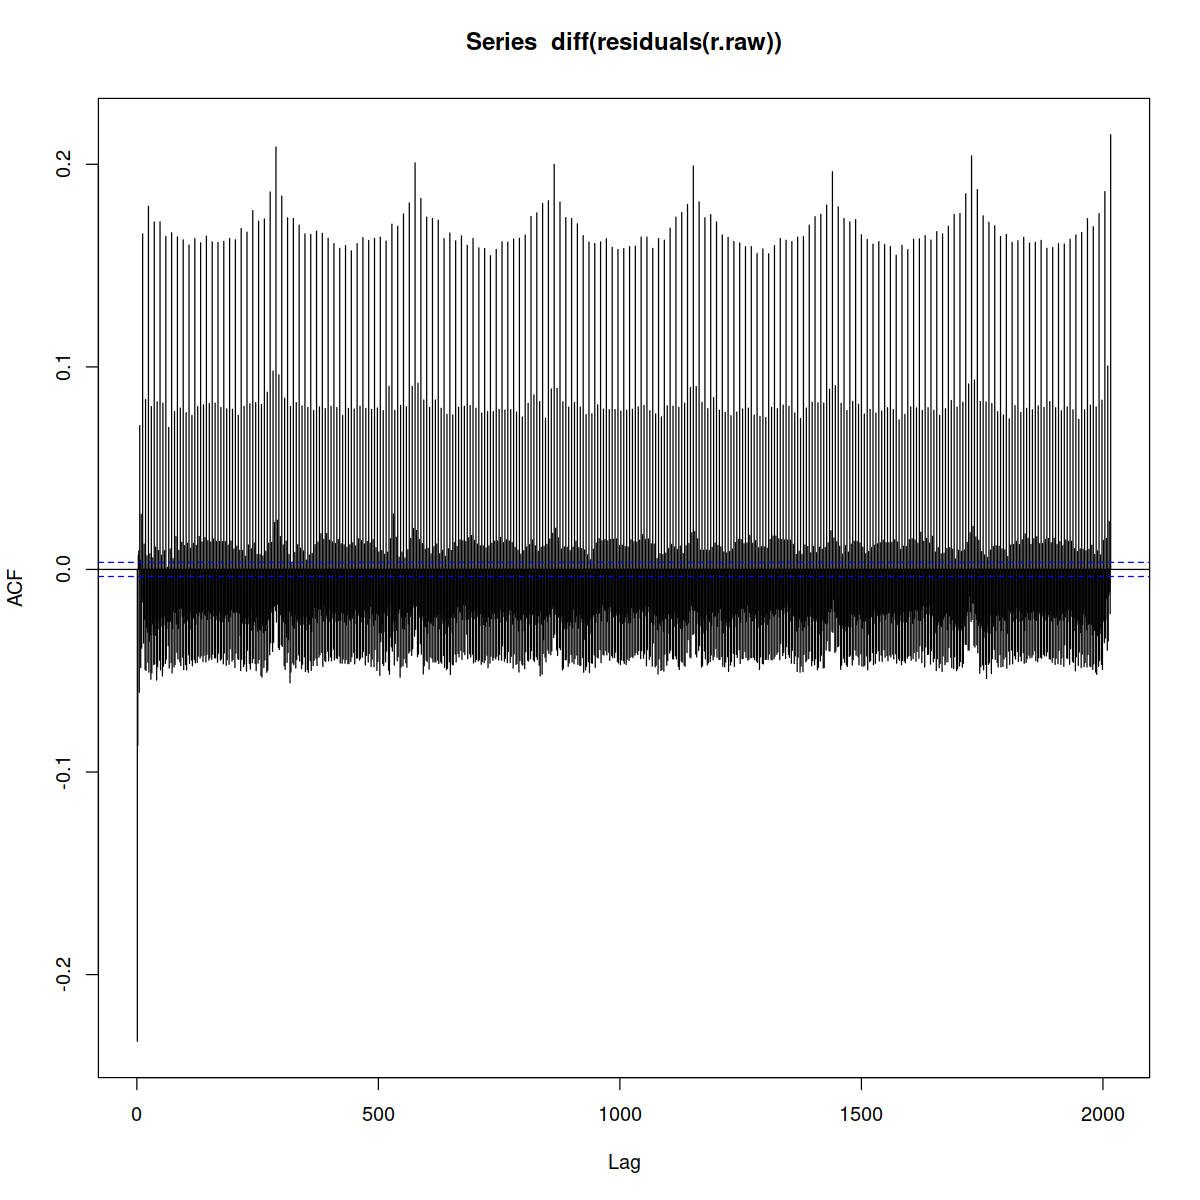

In [221]:
Acf(diff(residuals(r.raw)), lag.max = 288*7)

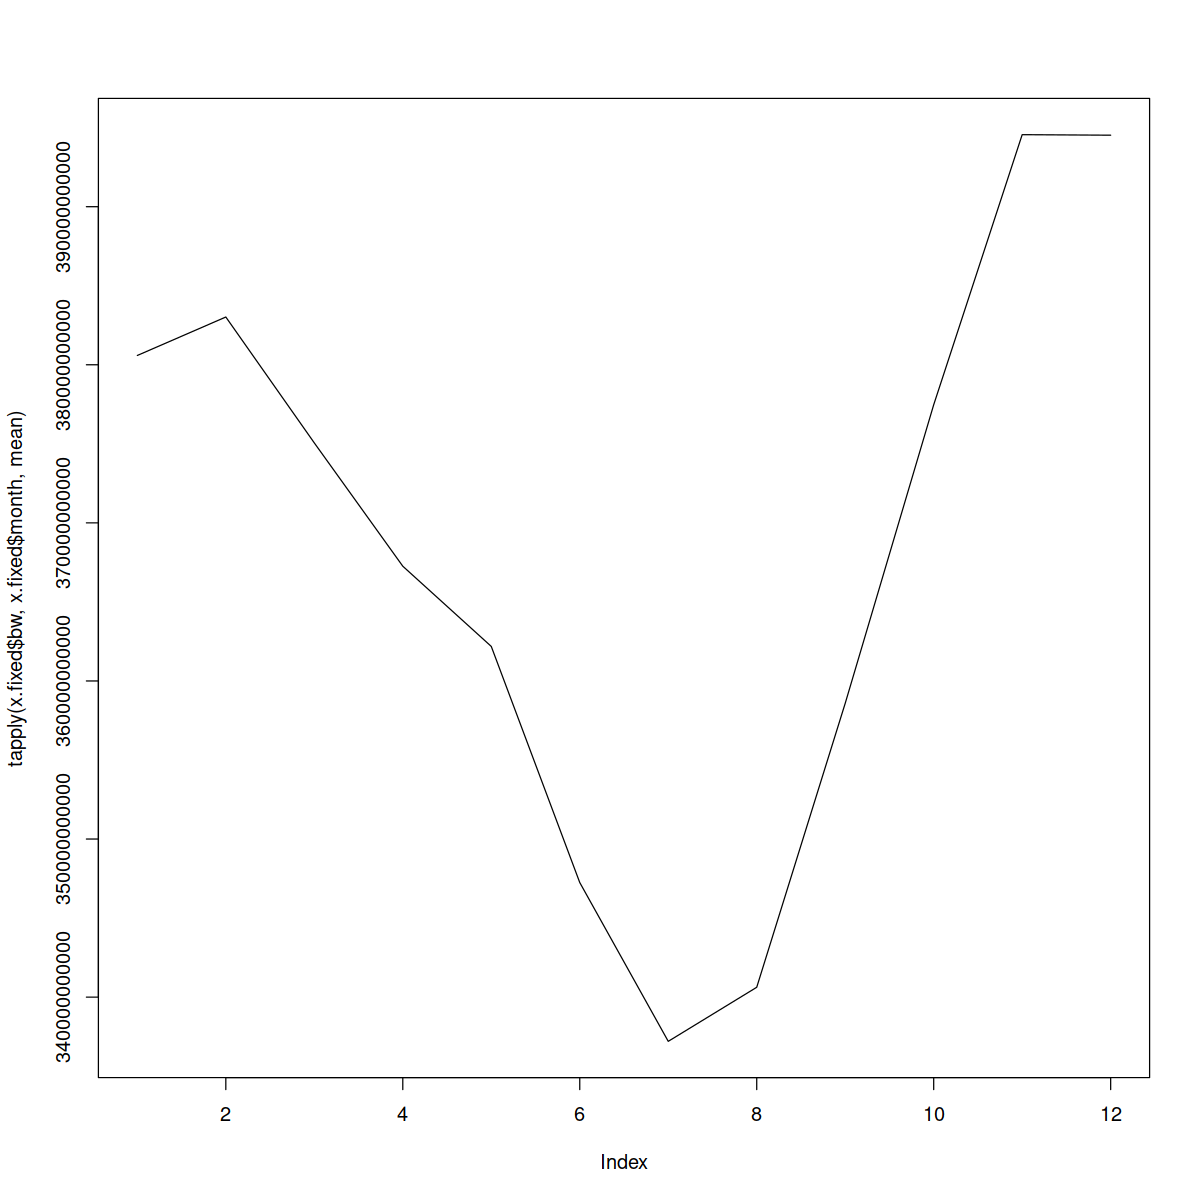

In [222]:
# raw monthly mean
plot(tapply(x.fixed$bw, x.fixed$month, mean), type="l")

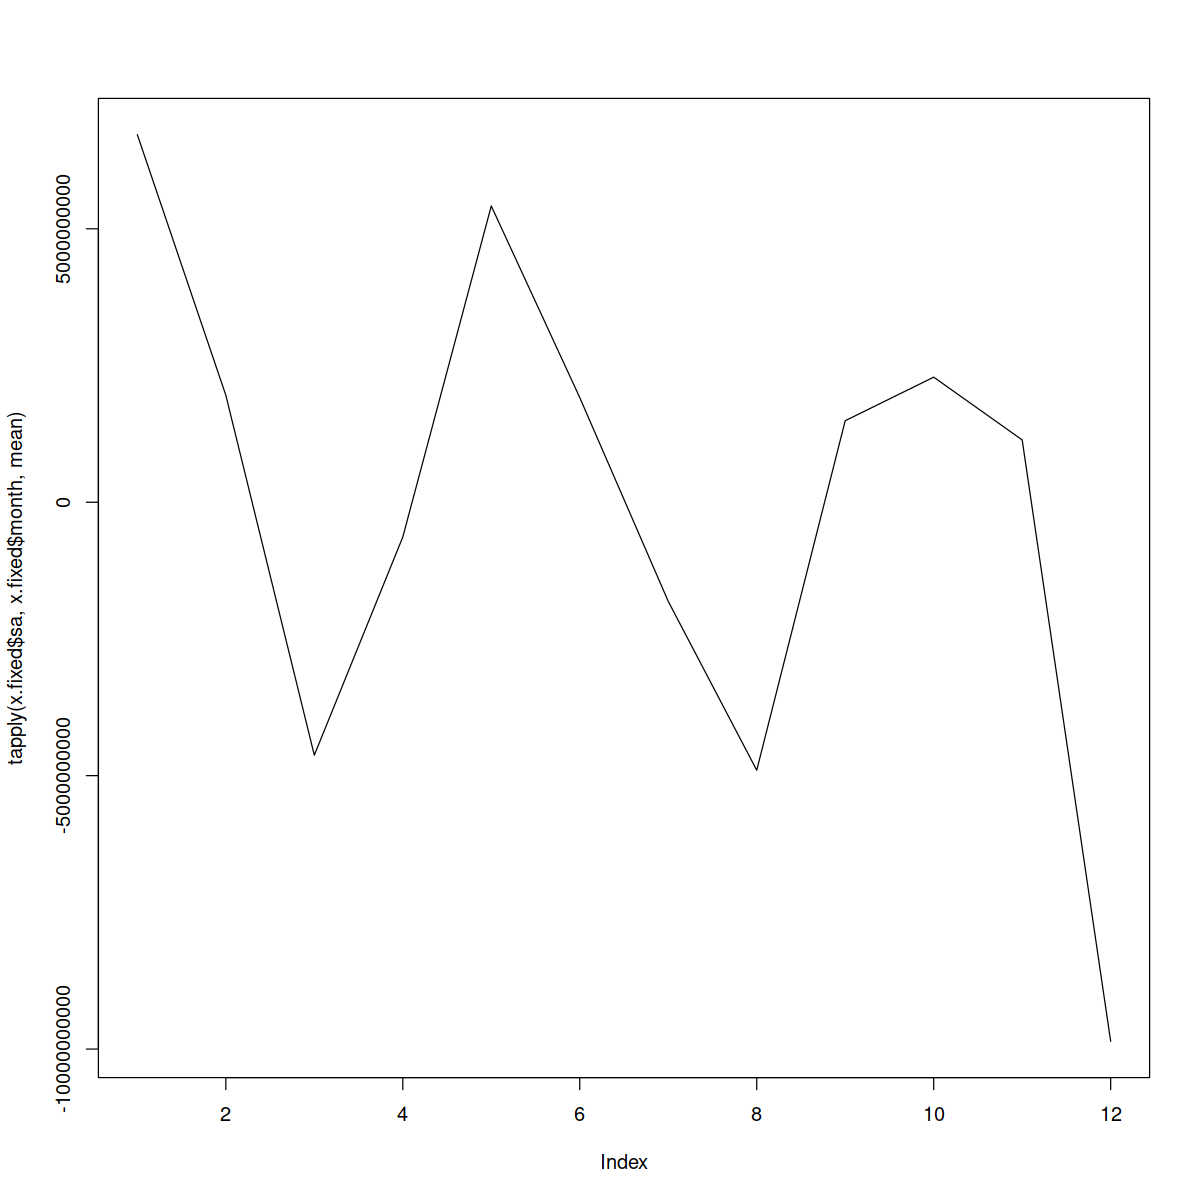

In [223]:
# seasonal adjustment (trend + winter/summer cycle + inter-week) - winter season now gone
x.fixed$sa <- x.fixed$bw - (r.raw$t + r.raw$c3 + r.raw$c4)
# model
x.fixed$model <- with(r.raw, t + c3 + c4 + c1+c2+c5+c6  +c7+c8+c9+c10+c11+c12+c13)
# parts of model
x.fixed$trend <- r.raw$t                         # just the trend
x.fixed$winter_summer <- r.raw$c3                # the winter/summer slow trend
x.fixed$inter_week_midweek_peak <- r.raw$c4      # mid-week peak, weekend drop
#x.fixed$inter_week_wed_drop <- r.raw$c9          # drop off on wednesday
x.fixed$day_main <- r.raw$c1                     # main daily cycle
x.fixed$day_evening <- r.raw$c2                  # evening peak
x.fixed$day_lunch <- r.raw$c5                    # highest frequency component: adds in a lunchtime peak
#x.fixed$day_commute <- with(r.raw, c6+c7+c8+c10) # inter-day slow waves (has effect of removing commute drop at weekends and modulating during week.)
x.fixed$day_evening_2 <- r.raw$c6                # makes evening peak higher.
x.fixed$day_commute <- with(r.raw, c7+c8+c9+c10+c11+c12) # inter-day slow waves (has effect of removing commute drop at weekends and modulating during week.)

plot(tapply(x.fixed$sa, x.fixed$month, mean), type="l")

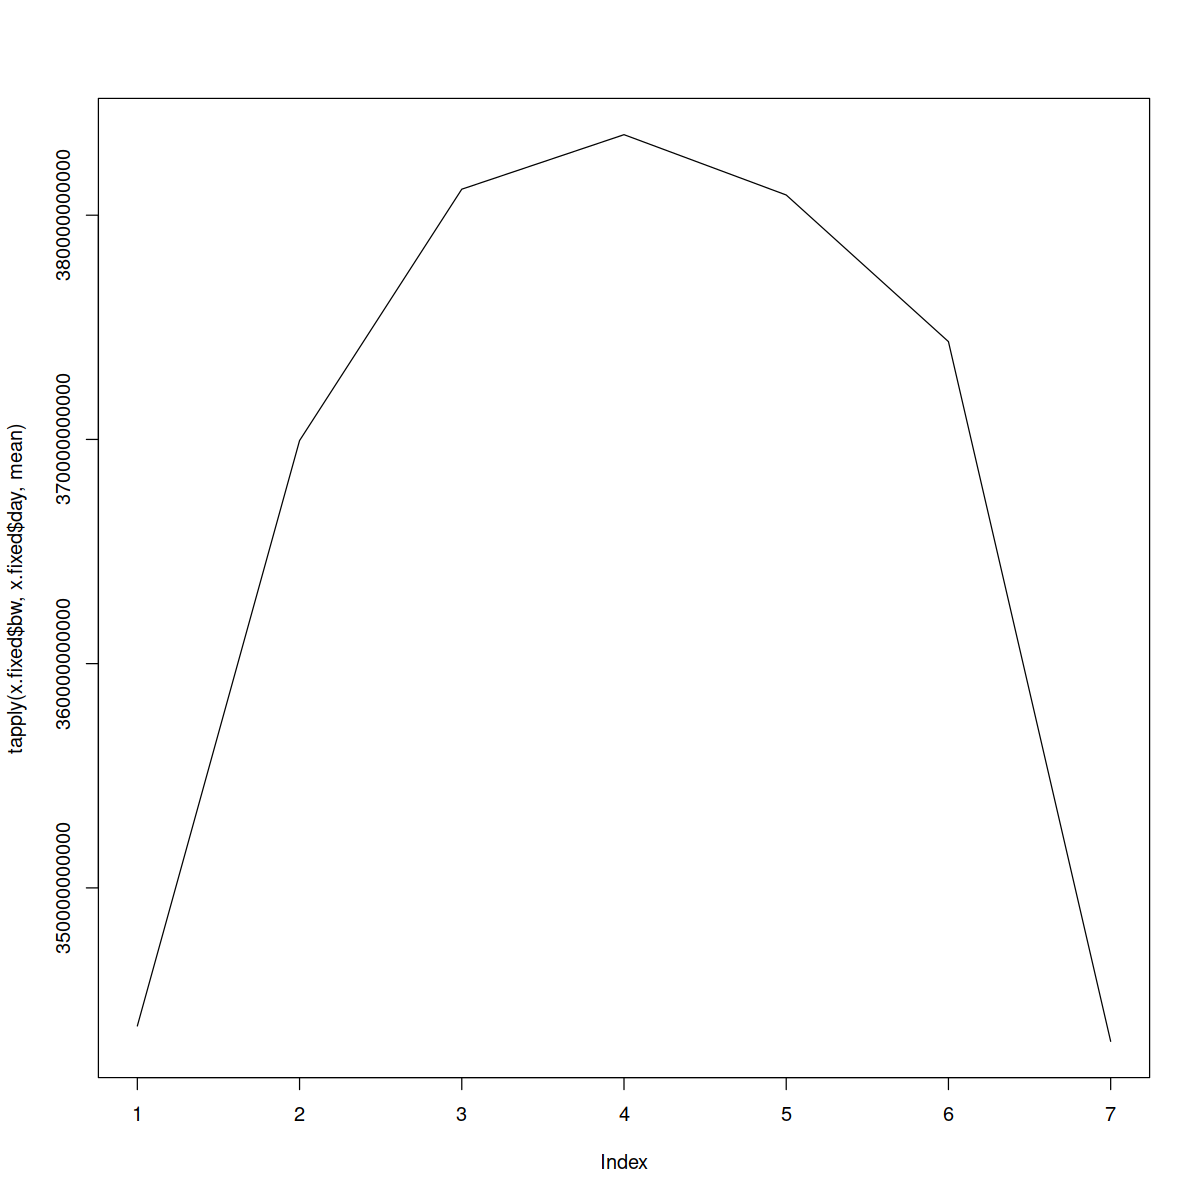

In [224]:
# raw daily
plot(tapply(x.fixed$bw, x.fixed$day, mean), type="l")

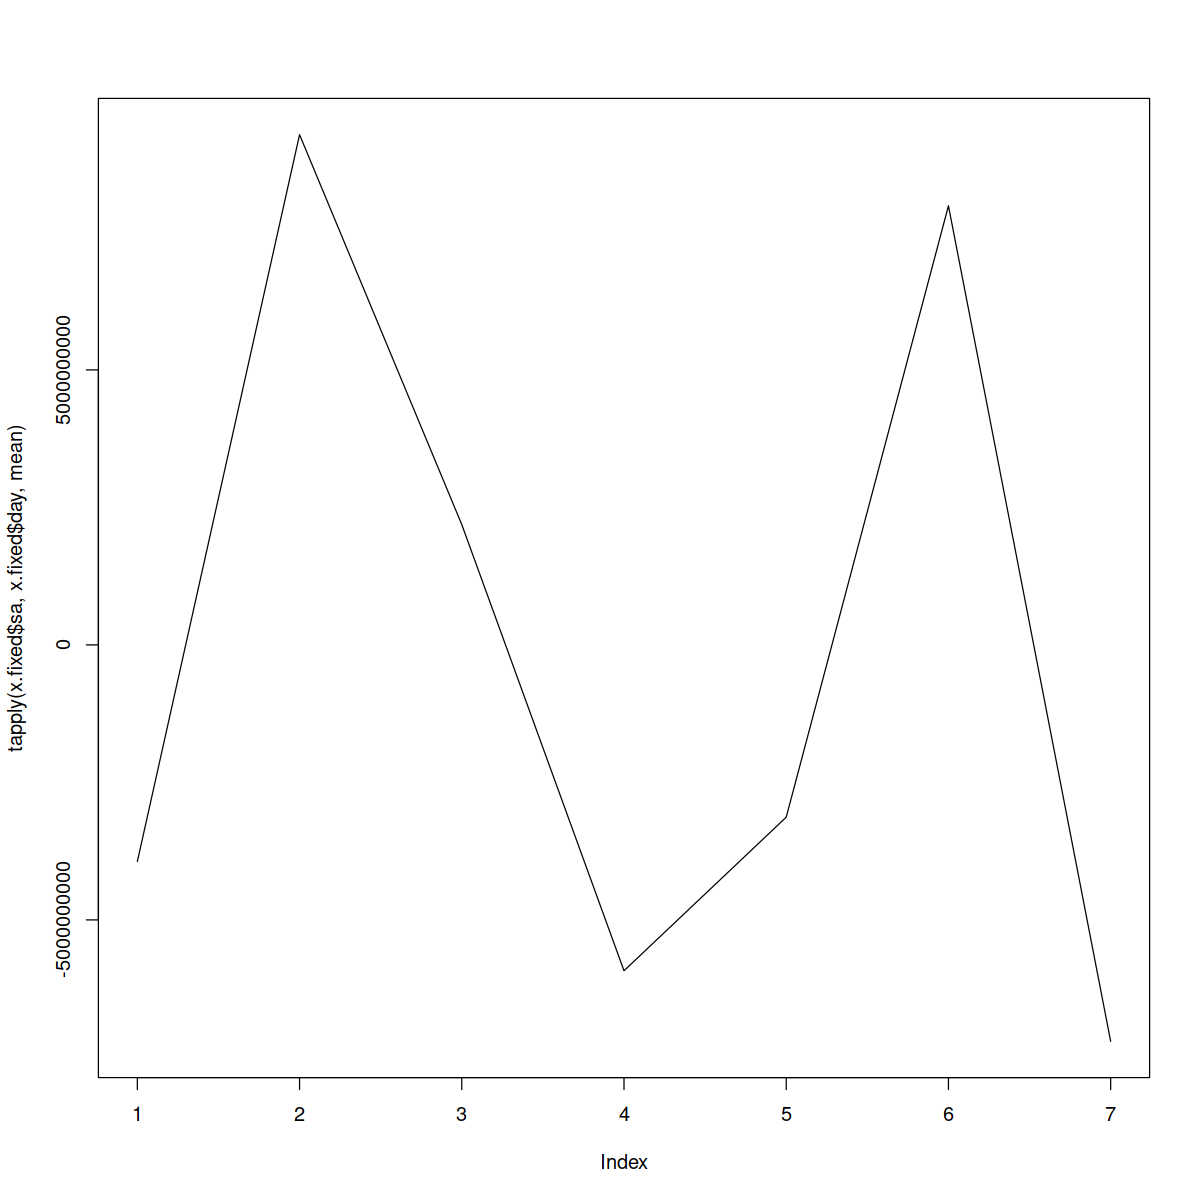

In [225]:
# daily seasonal adjustment (weekly season now gone)
plot(tapply(x.fixed$sa, x.fixed$day, mean), type="l")

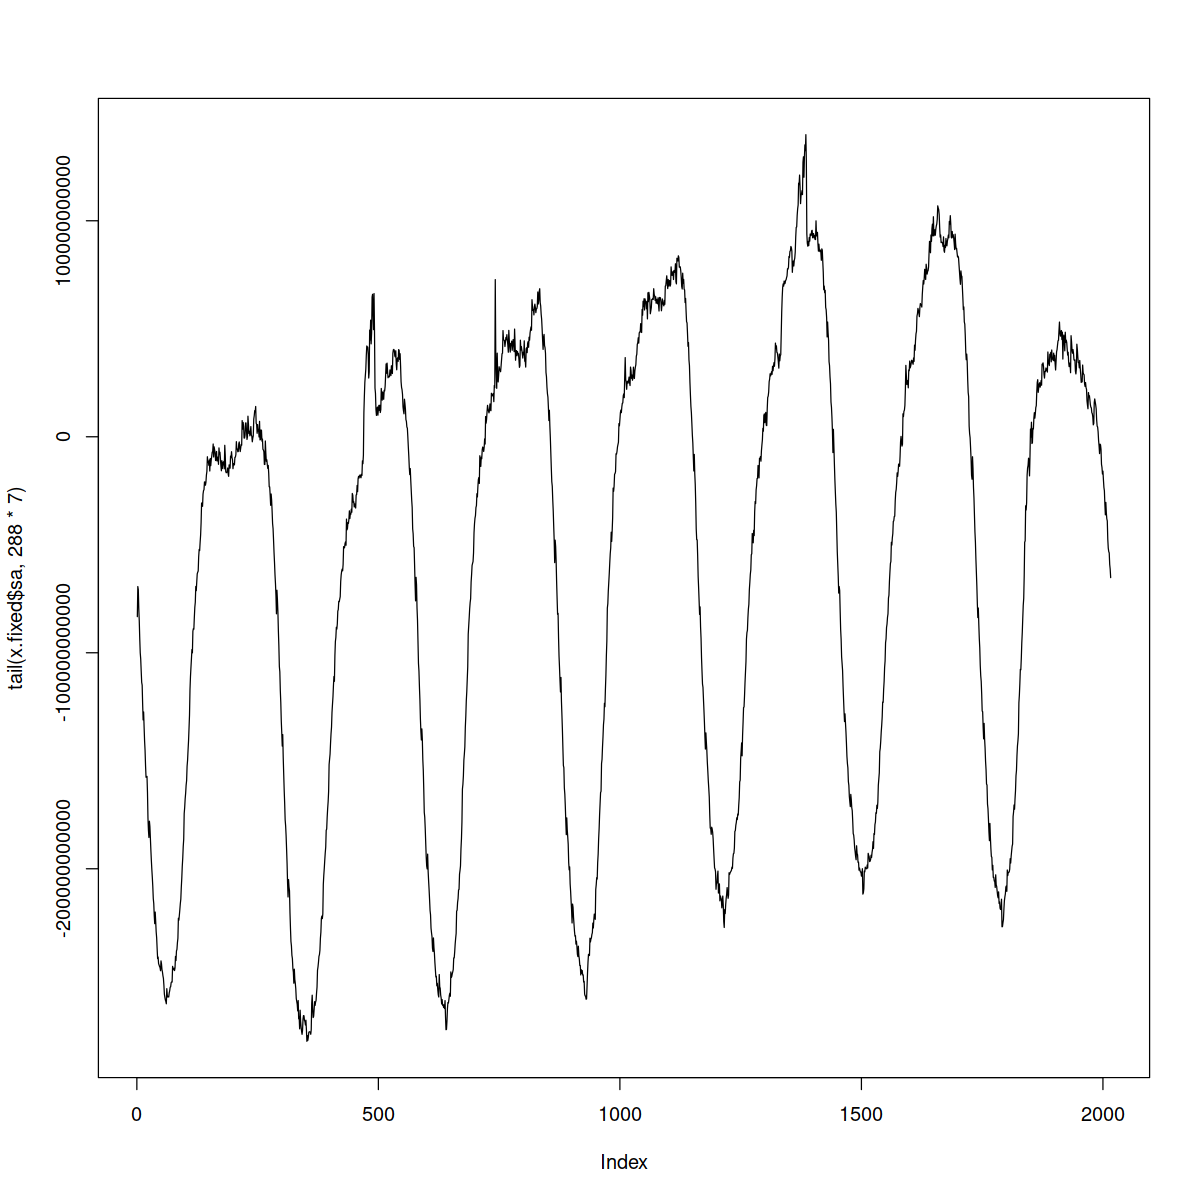

In [226]:
plot(tail(x.fixed$sa, 288*7), type="l")

In [227]:
head(x.fixed)

date       day    msm bw           month sa           model       
1 2016-01-01 Friday  0  275042335230 1     -46042329033 279084501186
2 2016-01-01 Friday  5  277258803065 1     -43780773163 273288665960
3 2016-01-01 Friday 10  273613453546 1     -47380771554 267550610131
4 2016-01-01 Friday 15  275278034771 1     -45670714756 261881398636
5 2016-01-01 Friday 20  277512097752 1     -43390934210 256290721305
6 2016-01-01 Friday 25  276314243723 1     -44542760102 250787820105
  trend        winter_summer inter_week_midweek_peak day_main     day_evening
1 321900819889 -4118289527   3302133901              -46548643756 26515573421
2 321901065983 -4111040225   3249550470              -49441365187 24395621498
3 321901302437 -4103952232   3196874895              -52310586048 22229163897
4 321901532352 -4096923578   3144140753              -55154933570 20020331939
5 321901745445 -4090045968   3091332485              -57973075152 17773308788
6 321901933840 -4083373405   3038443390              -60763685475 15492355438
  day_lunch    day_evening_2 day_commute 
1  -9691490147 -2432339048   -15746199270
2 -10434328027 -2205043351   -16007882285
3 -11097886851 -1976336811   -16268895540
4 -11677112542 -1746328692   -16528823778
5 -12167618976 -1515177681   -16787589915
6 -12565688970 -1283033582   -17045035998

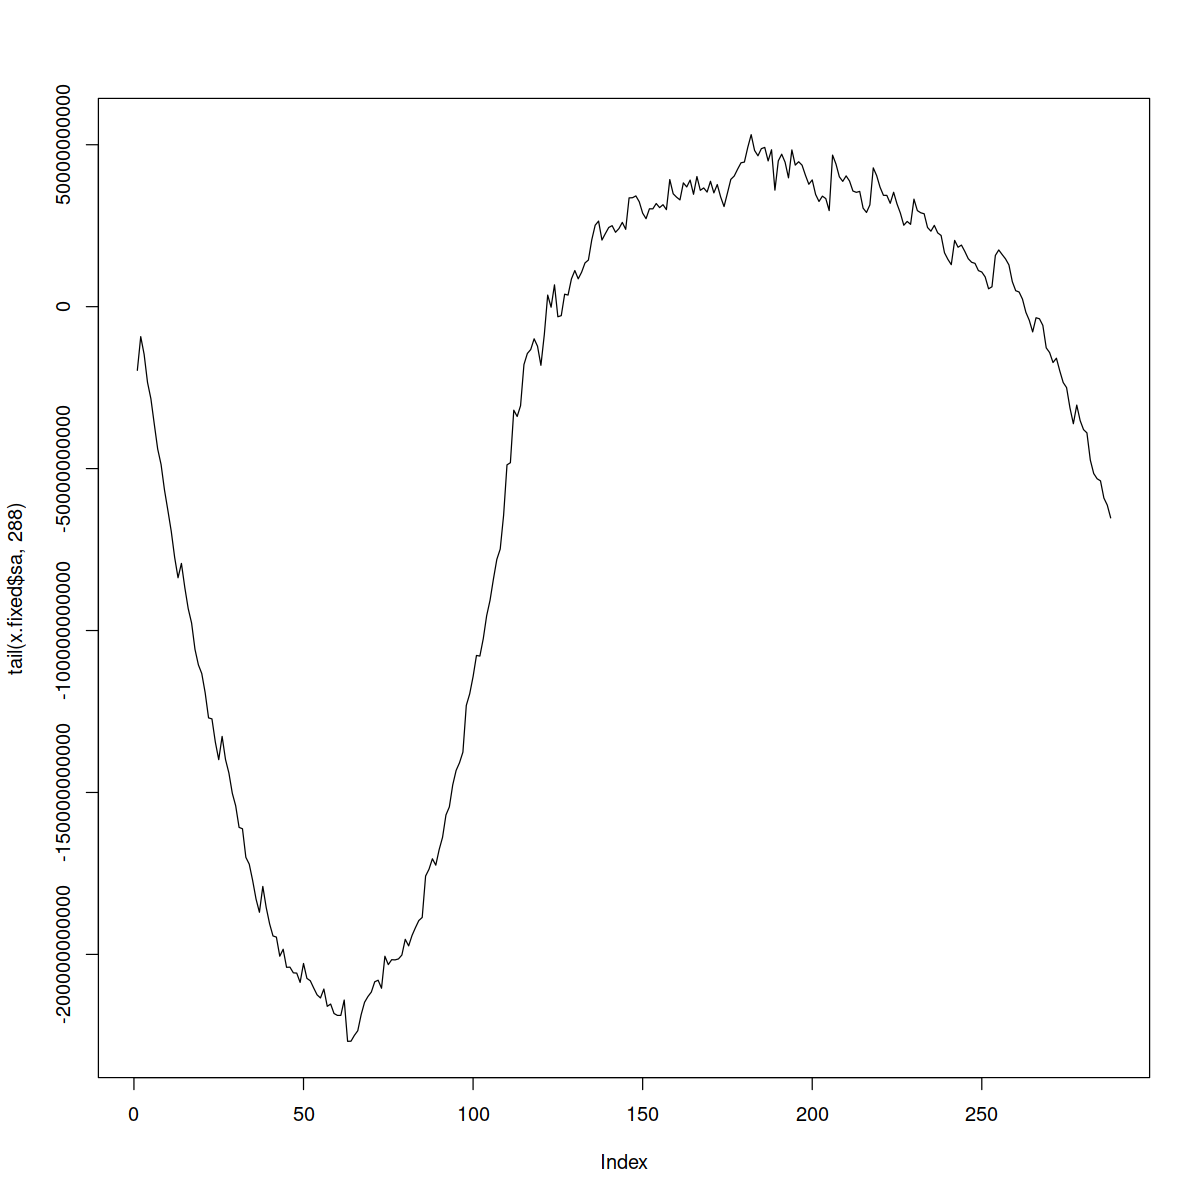

In [228]:
plot(tail(x.fixed$sa, 288), type="l")

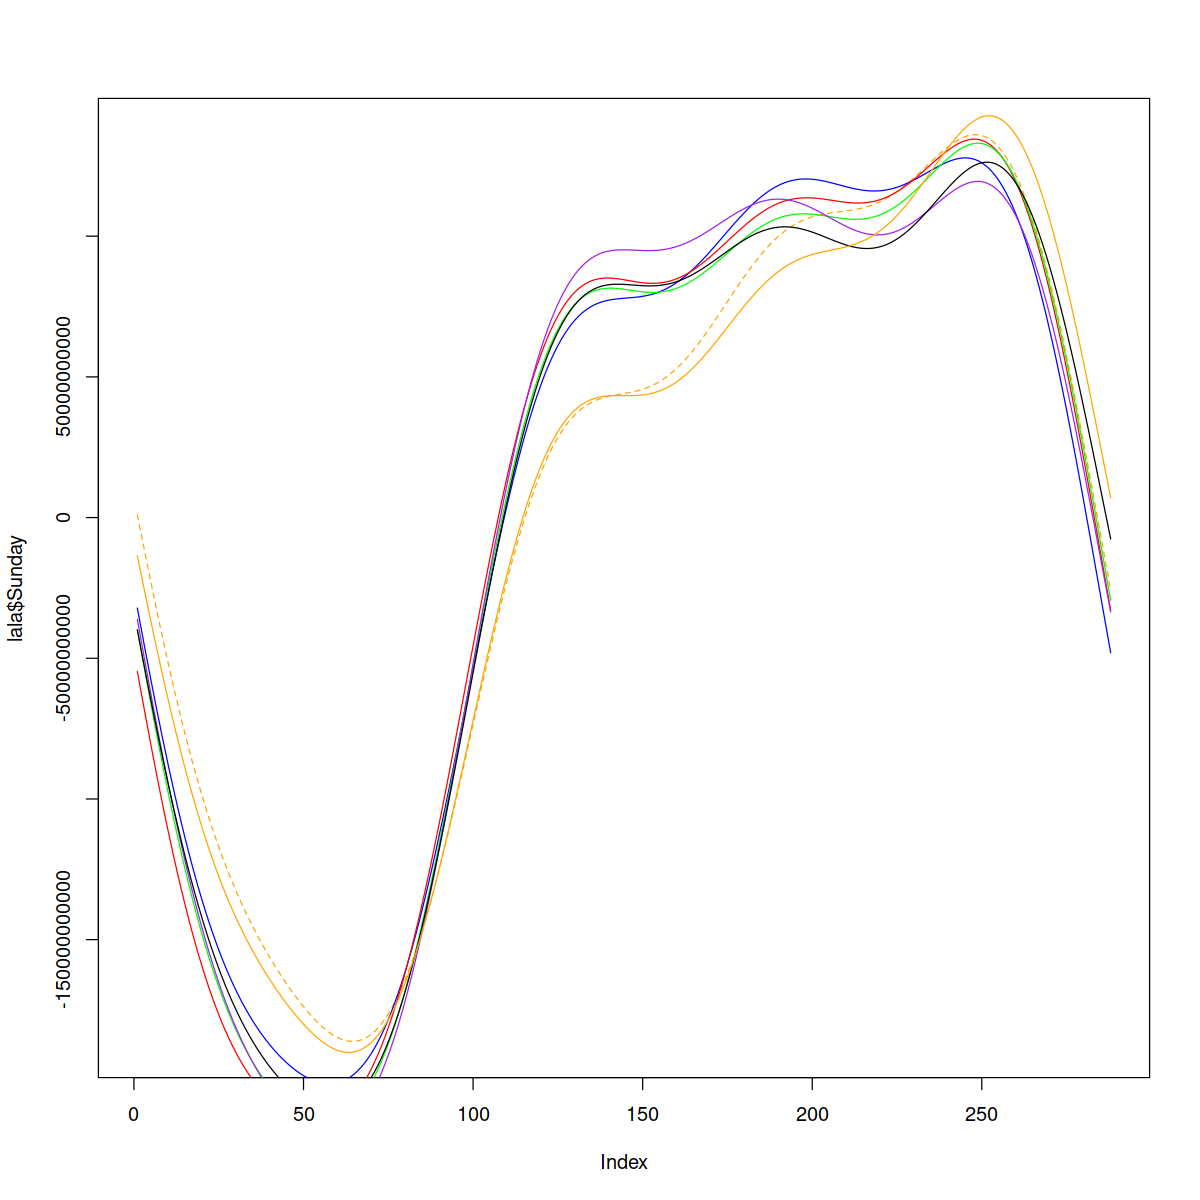

In [229]:
lala <- data.frame(t(with(x.fixed, tapply(day_main+day_evening+day_lunch+day_evening_2+day_commute, list(day, msm), mean))))
plot(lala$Sunday, type="l", col="orange", lty=2)
lines(lala$Monday, col="blue")
lines(lala$Tuesday, col="red")
lines(lala$Wednesday, col="green")
lines(lala$Thursday, col="purple")
lines(lala$Friday, col="black")
lines(lala$Saturday, col="orange")

In [230]:
#write.csv(x.fixed, "../data/lon2_2016-2018_season_adjust.csv", quote=F)

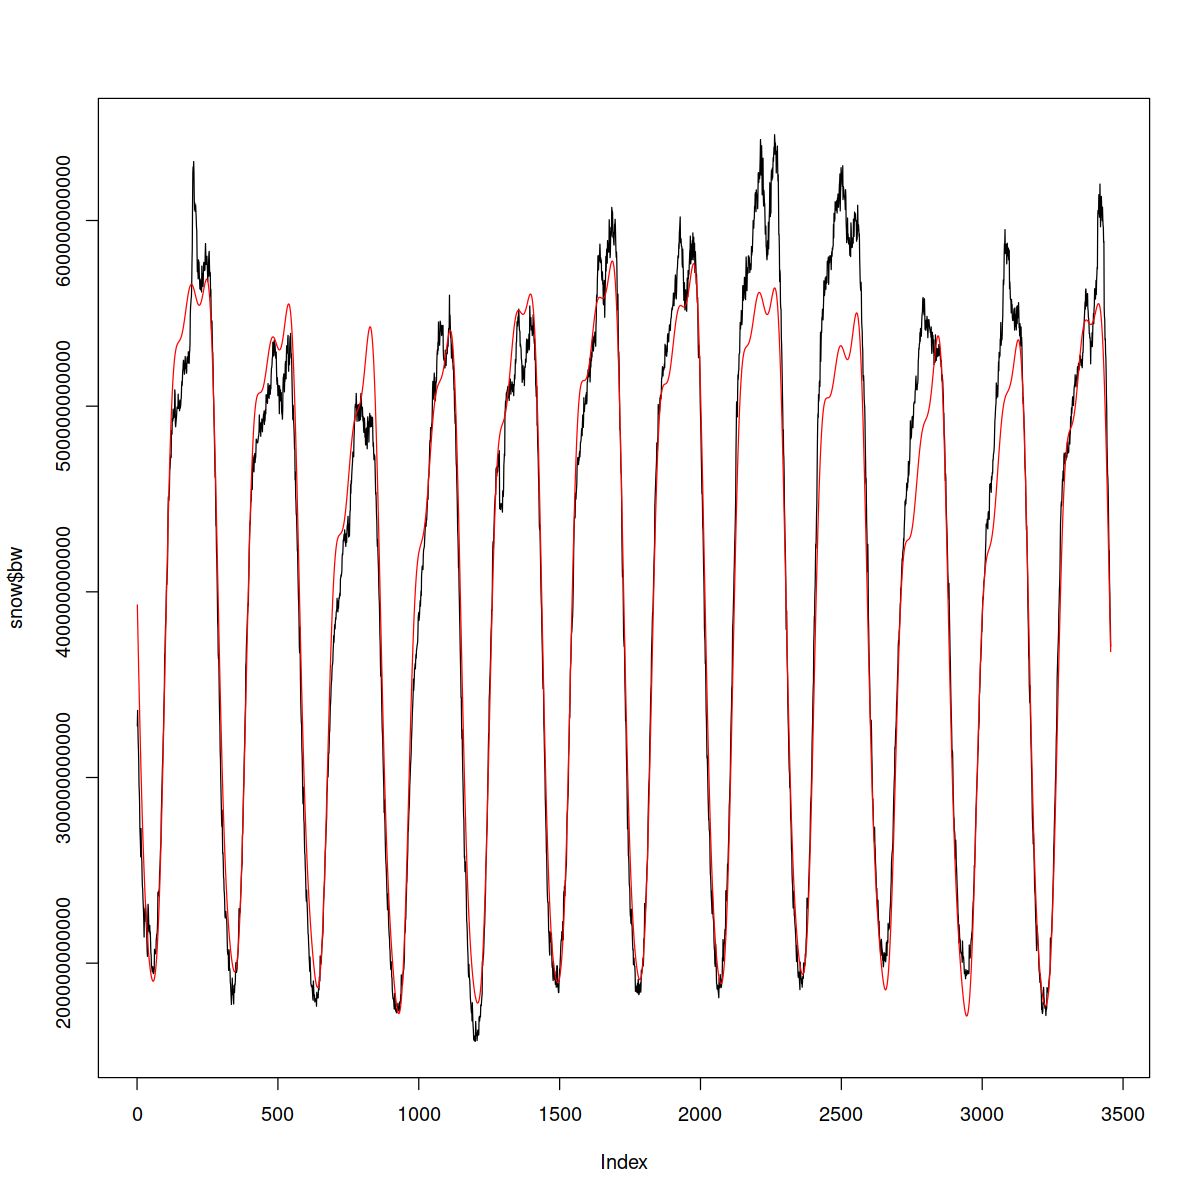

In [231]:
# "beast from the east"
# https://en.wikipedia.org/wiki/2018_Great_Britain_and_Ireland_cold_wave
snow <- x.fixed[x.fixed$date >= "2018-02-22" & x.fixed$date <= "2018-03-05", ]
plot(snow$bw, type="l")
lines(snow$model, col="red")

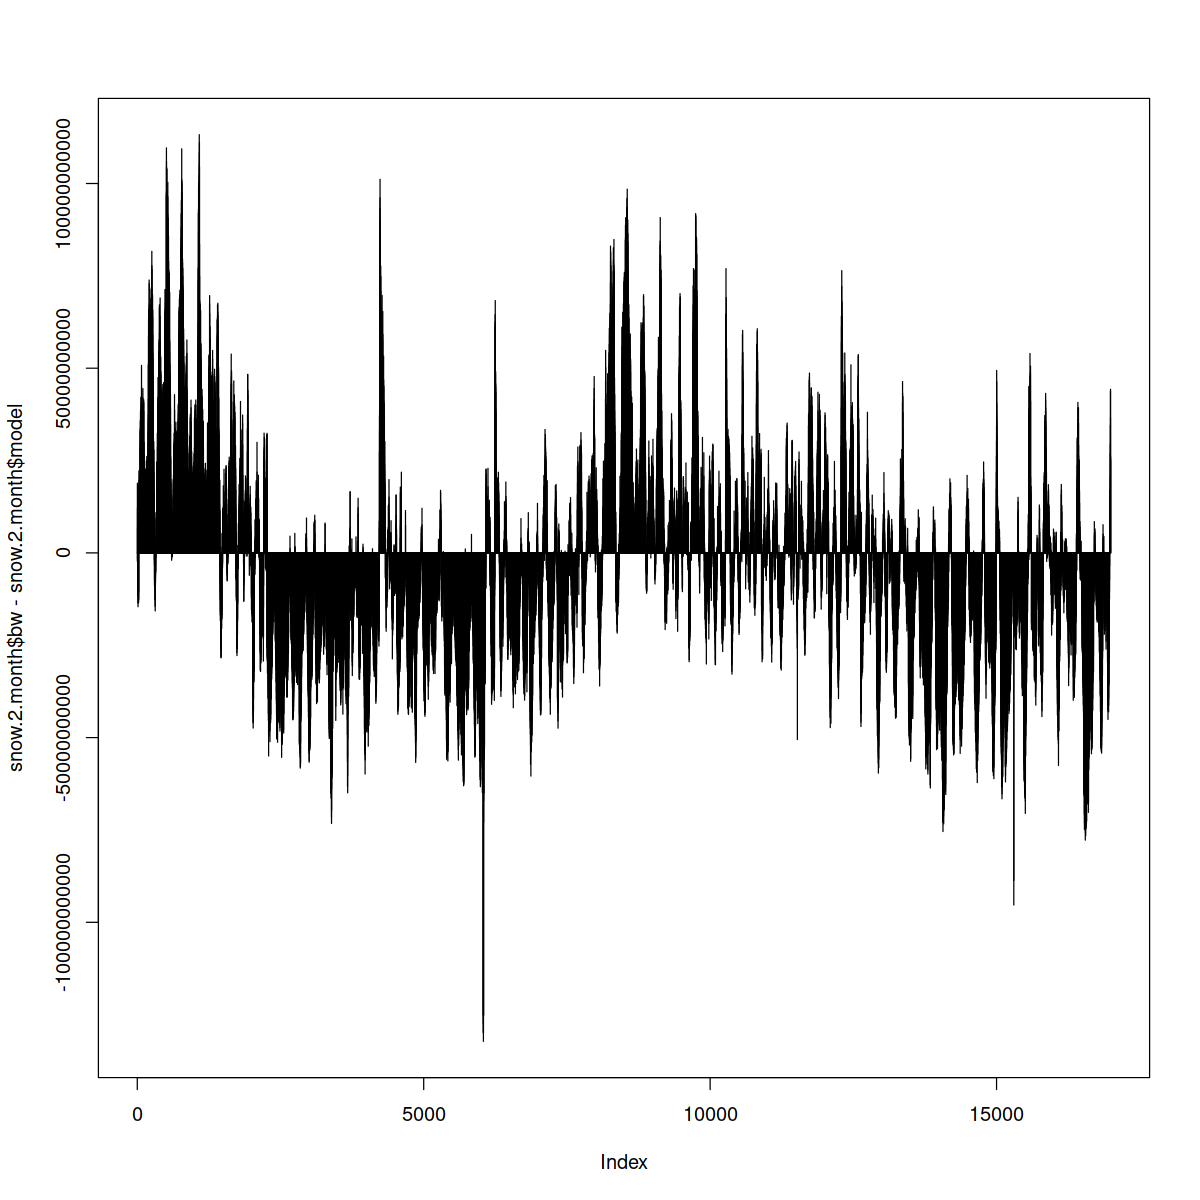

In [232]:
snow.2.month <- x.fixed[x.fixed$date >= "2018-02-01" & x.fixed$date <= "2018-03-31", ]
plot(snow.2.month$bw - snow.2.month$model, type="h")

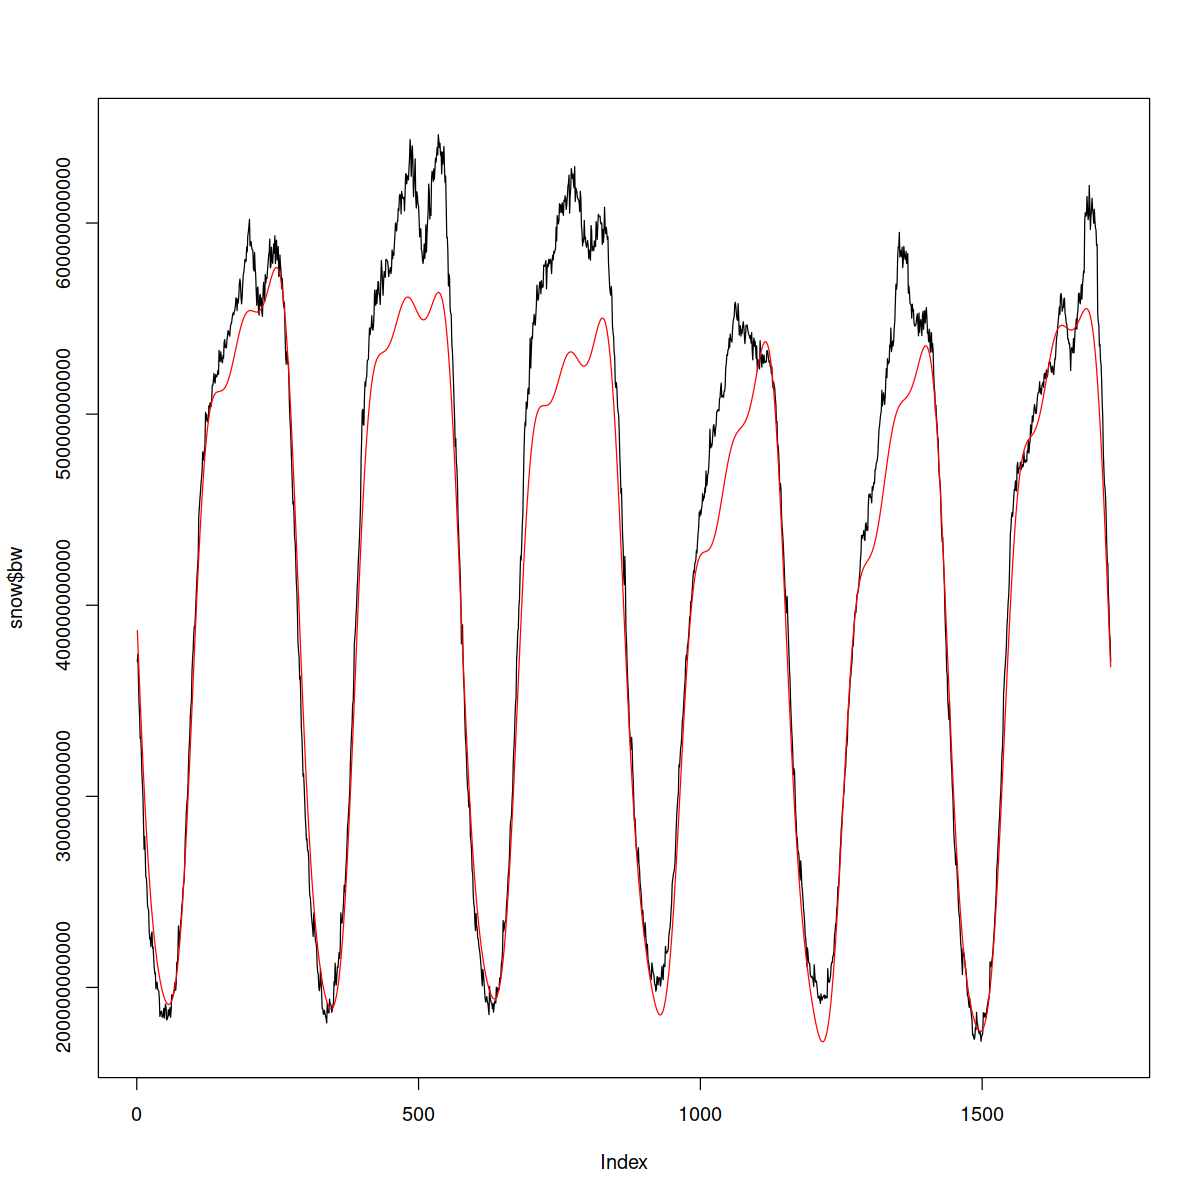

In [233]:
# "storm emma"
# https://en.wikipedia.org/wiki/2018_Great_Britain_and_Ireland_cold_wave
snow <- x.fixed[x.fixed$date >= "2018-02-28" & x.fixed$date <= "2018-03-05", ]
plot(snow$bw, type="l")
lines(snow$model, col="red")

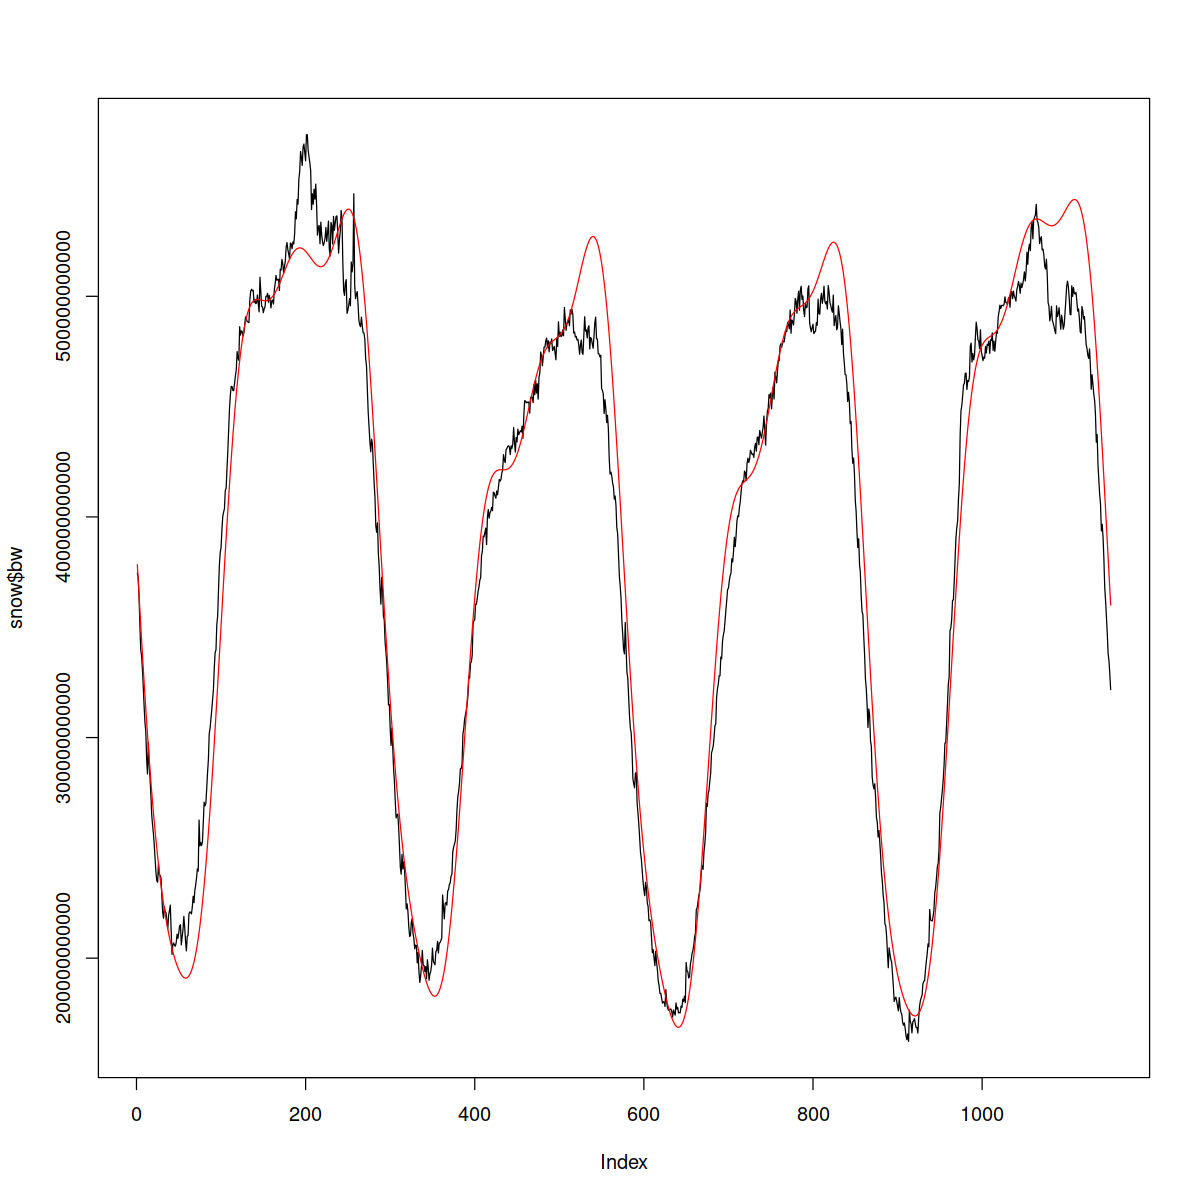

In [234]:
# "mini-beast from east" (happened at weekend, middle-2).
# https://en.wikipedia.org/wiki/2018_Great_Britain_and_Ireland_cold_wave
snow <- x.fixed[x.fixed$date >= "2018-03-16" & x.fixed$date <= "2018-03-19", ]
plot(snow$bw, type="l")
lines(snow$model, col="red")

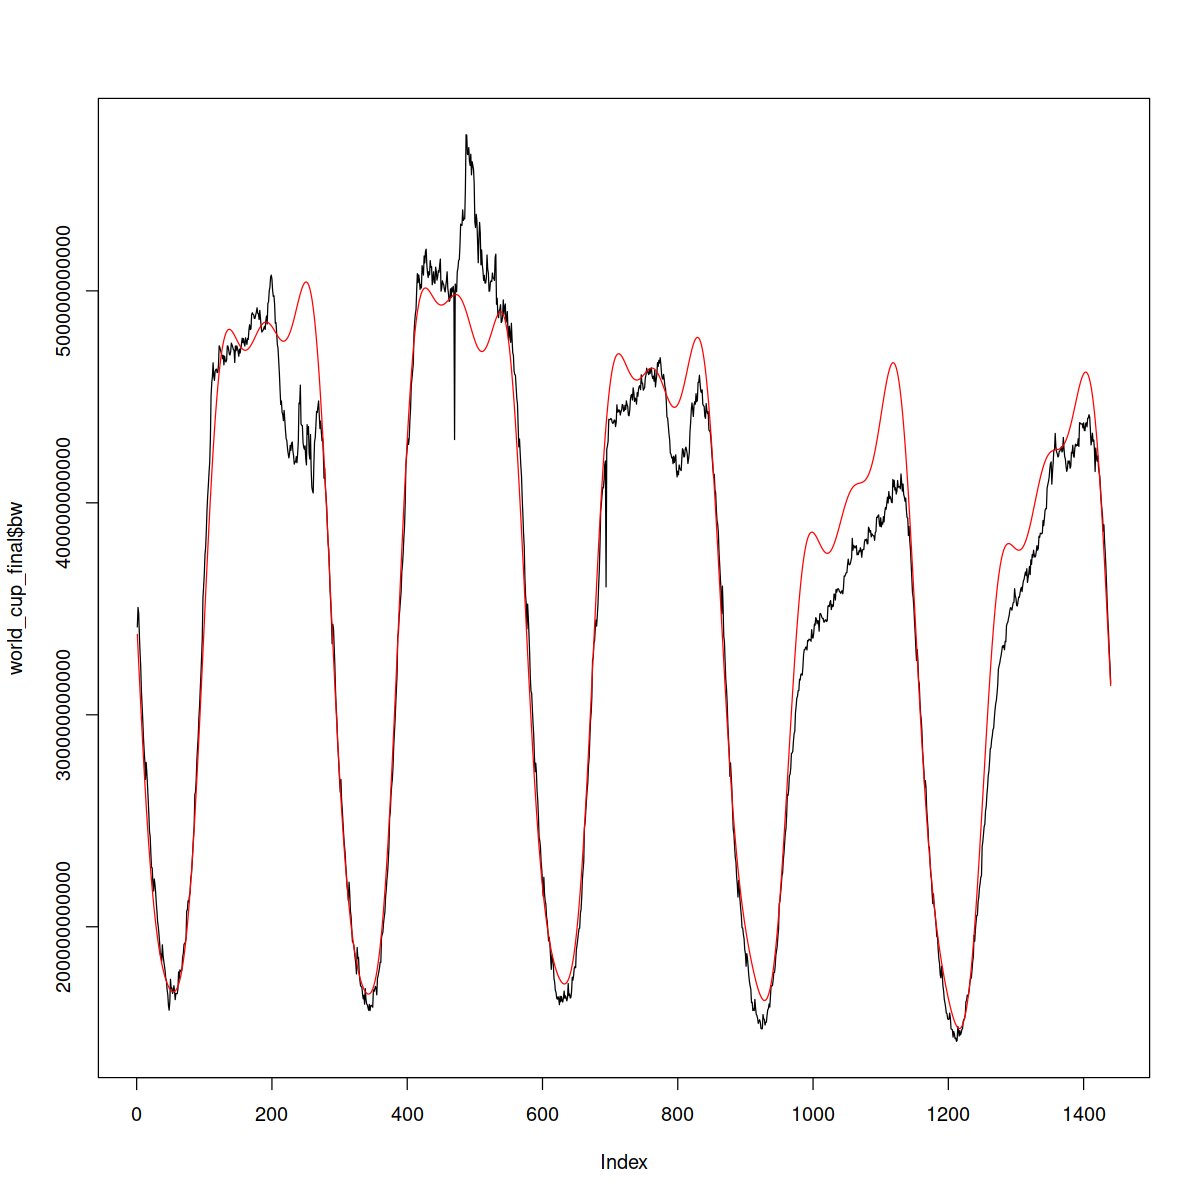

In [235]:
# eng vs croatia: 1st one. (wednesday)
# france vs croatia last one. (sunday)
world_cup_final <- x.fixed[x.fixed$date >= "2018-07-11" & x.fixed$date <= "2018-07-15", ]
plot(world_cup_final$bw, type="l")
lines(world_cup_final$model, col="red")

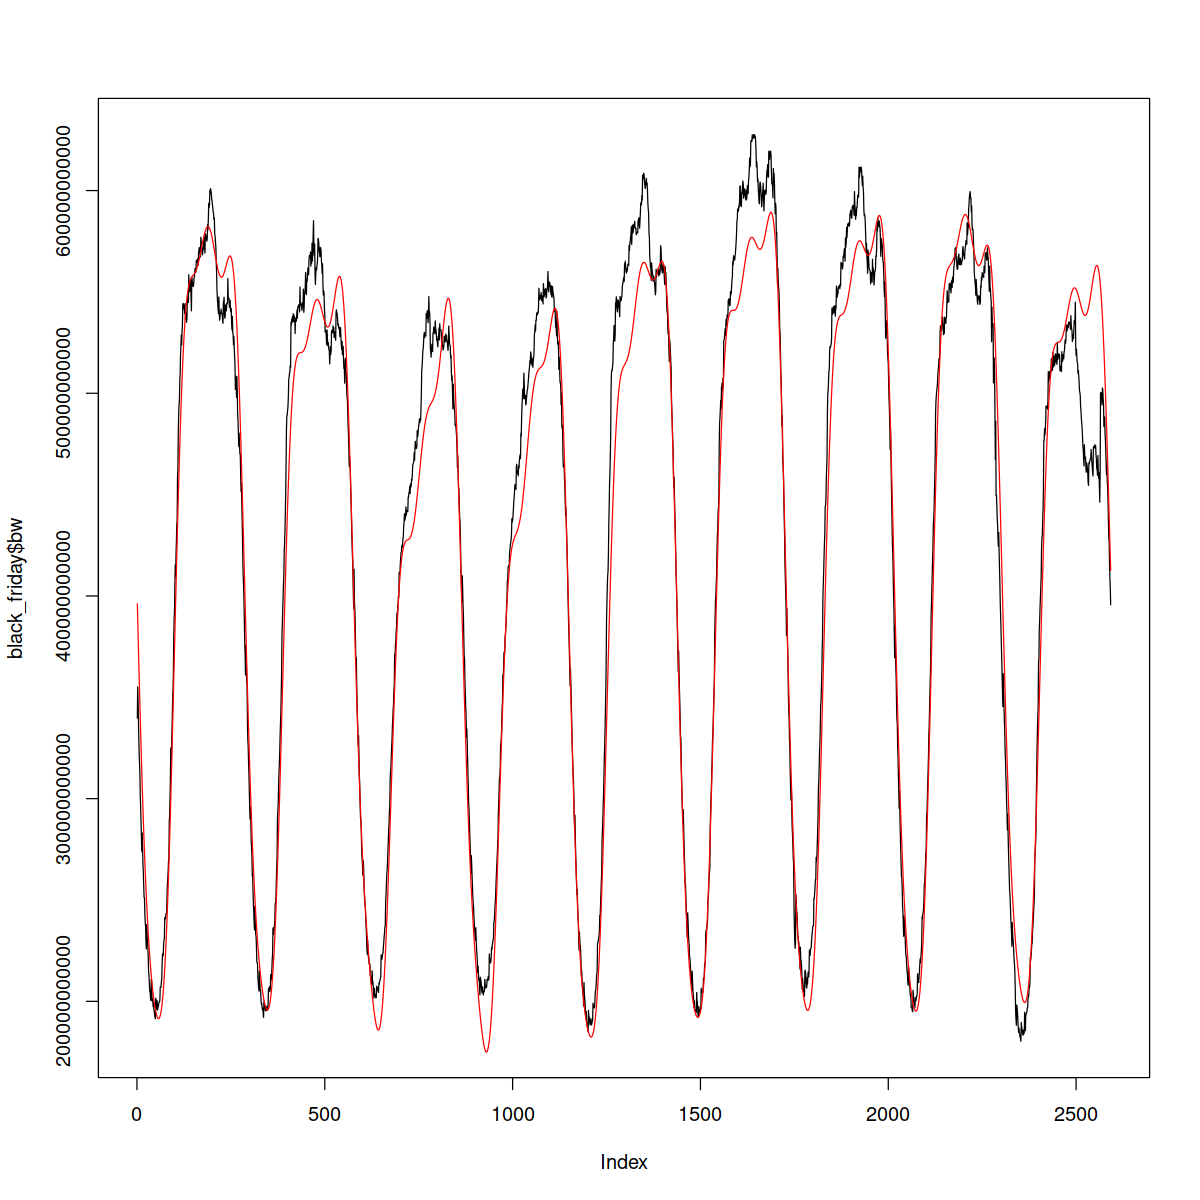

In [236]:
# black friday - second one.
# increased traffic on that day, following through weekend to cyber monday and day after cyber monday.
black_friday <- x.fixed[x.fixed$date >= "2018-11-22" & x.fixed$date <= "2018-11-30", ]
plot(black_friday$bw, type="l")
lines(black_friday$model, col="red")

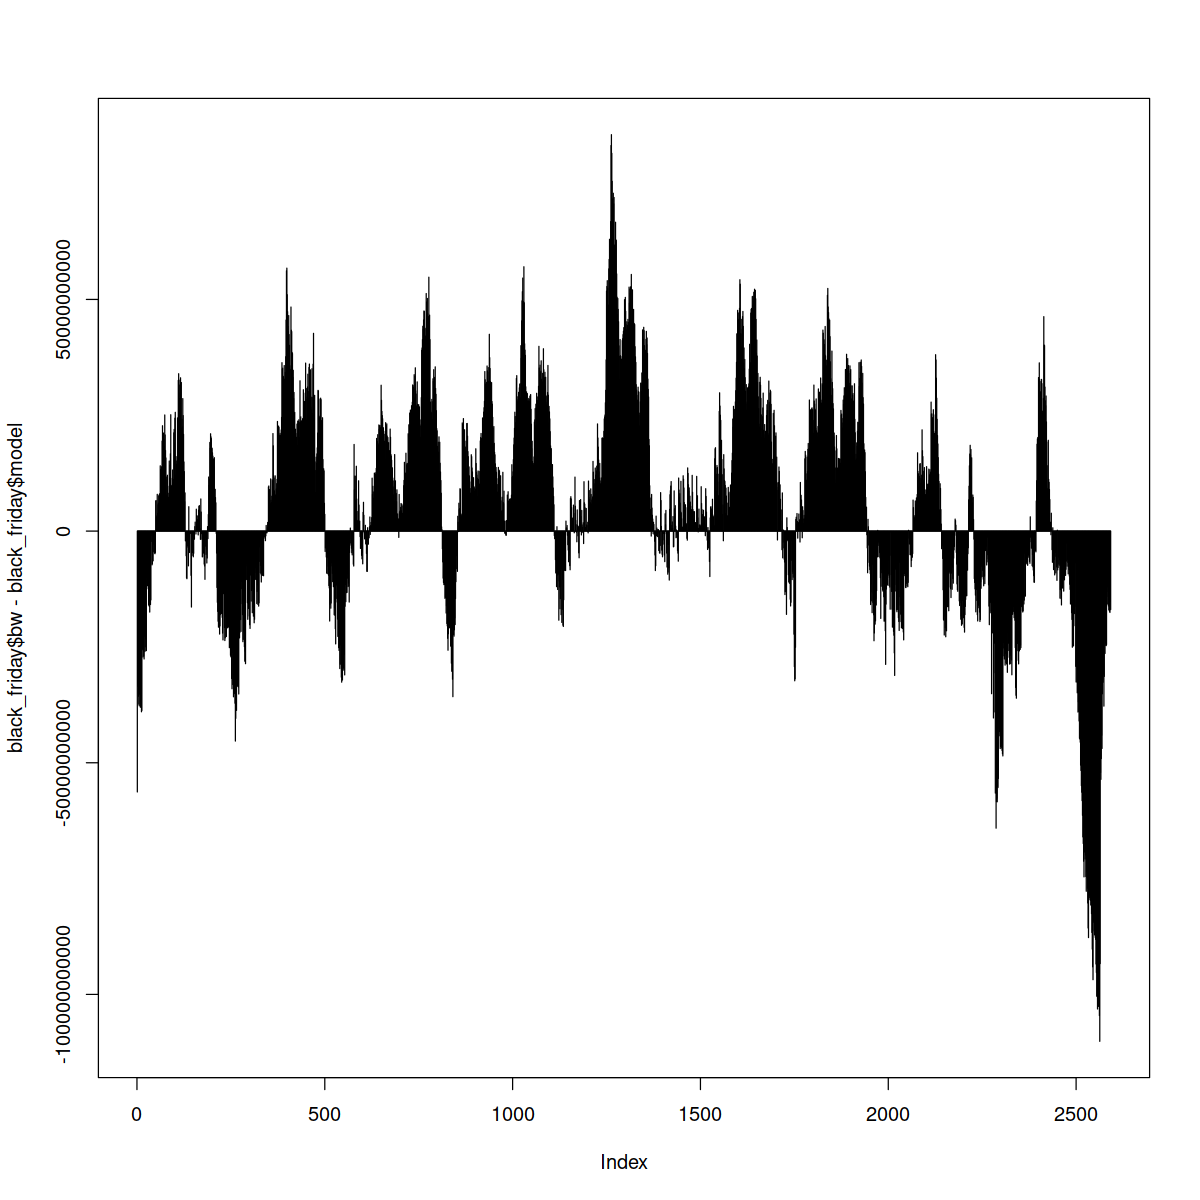

In [237]:
plot(black_friday$bw - black_friday$model, type="h")

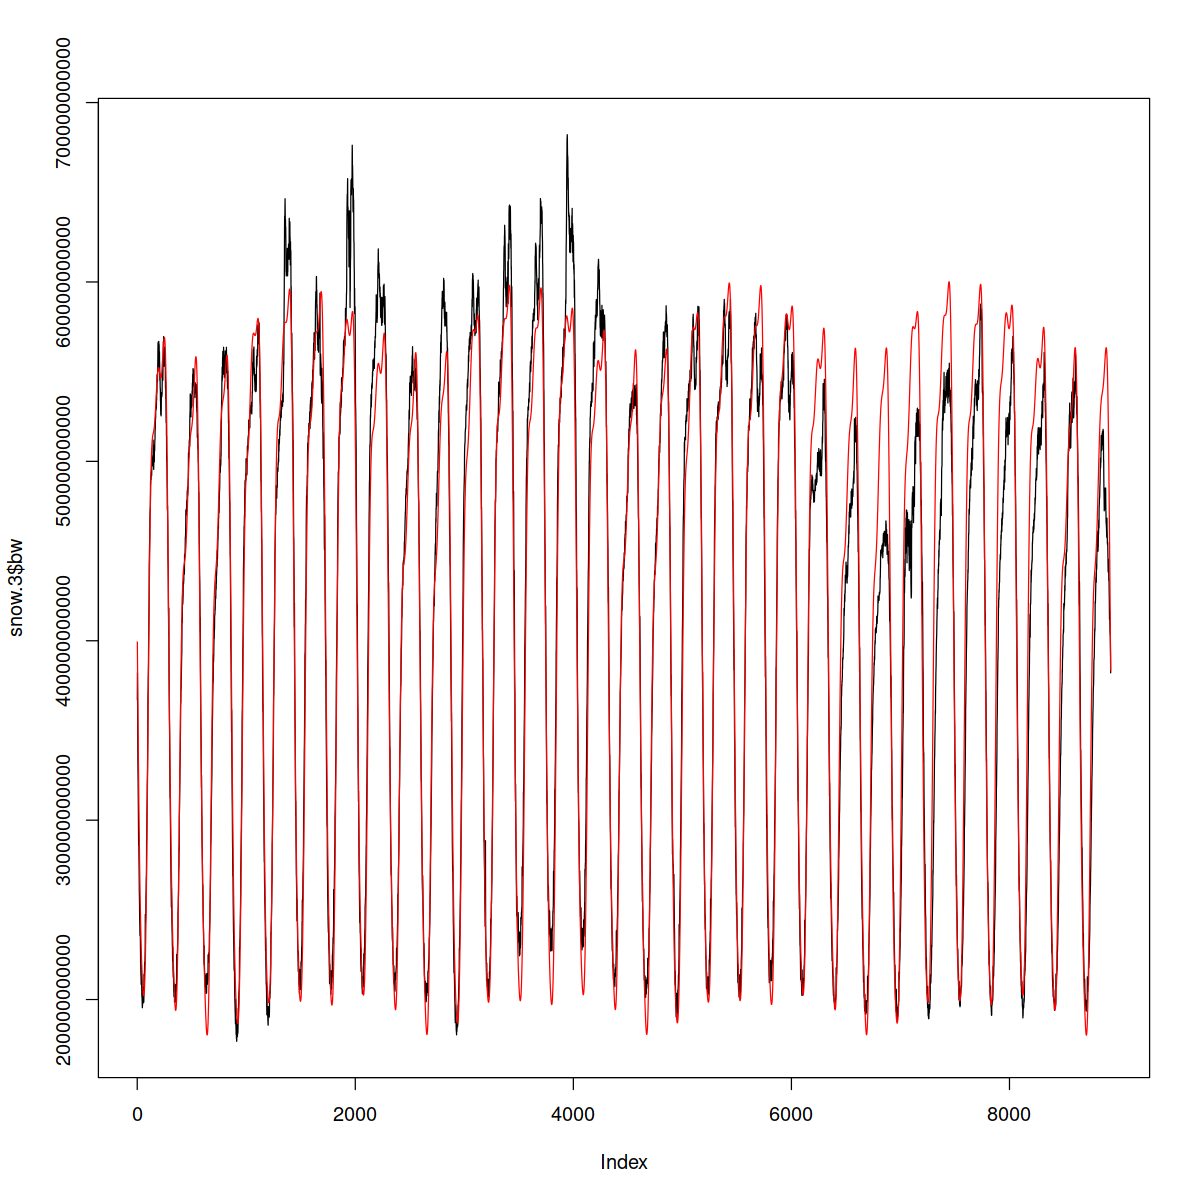

In [238]:
# december 2017 snow
snow.3 <- x.fixed[x.fixed$date >= "2017-12-01" & x.fixed$date <= "2017-12-31", ]
plot(snow.3$bw, type="l")
lines(snow.3$model, col="red")

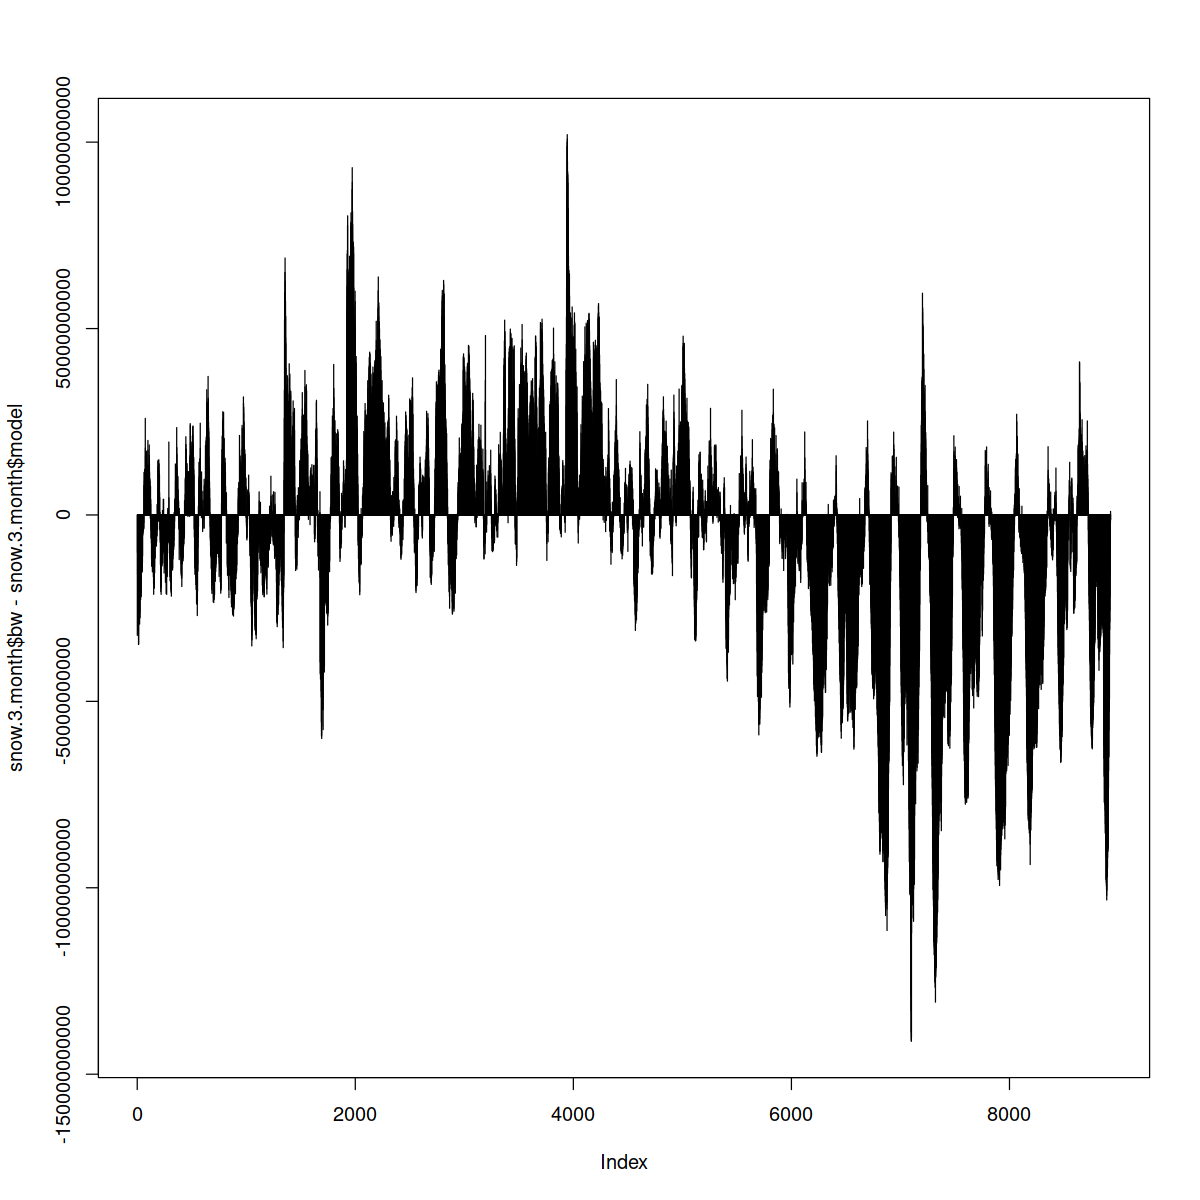

In [239]:
snow.3.month <- x.fixed[x.fixed$date >= "2017-12-01" & x.fixed$date <= "2017-12-31", ]
plot(snow.3.month$bw - snow.3.month$model, type="h")

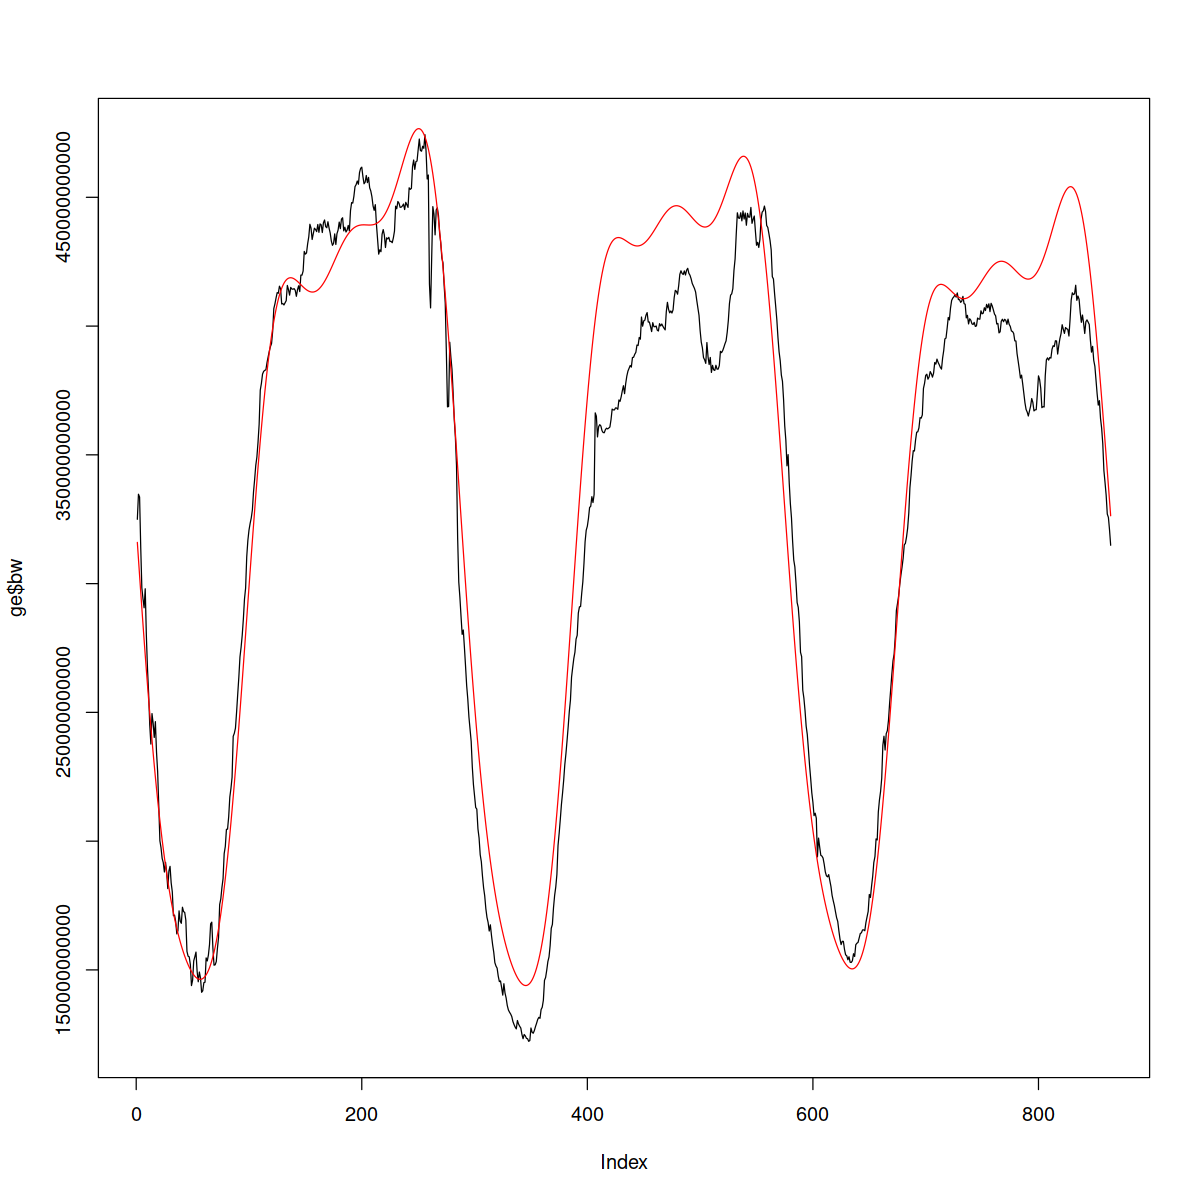

In [240]:
# june 2017 general election. 8th june - polling day.
ge <- x.fixed[x.fixed$date >= "2017-06-07" & x.fixed$date <= "2017-06-09", ]
plot(ge$bw, type="l")
lines(ge$model, col="red")

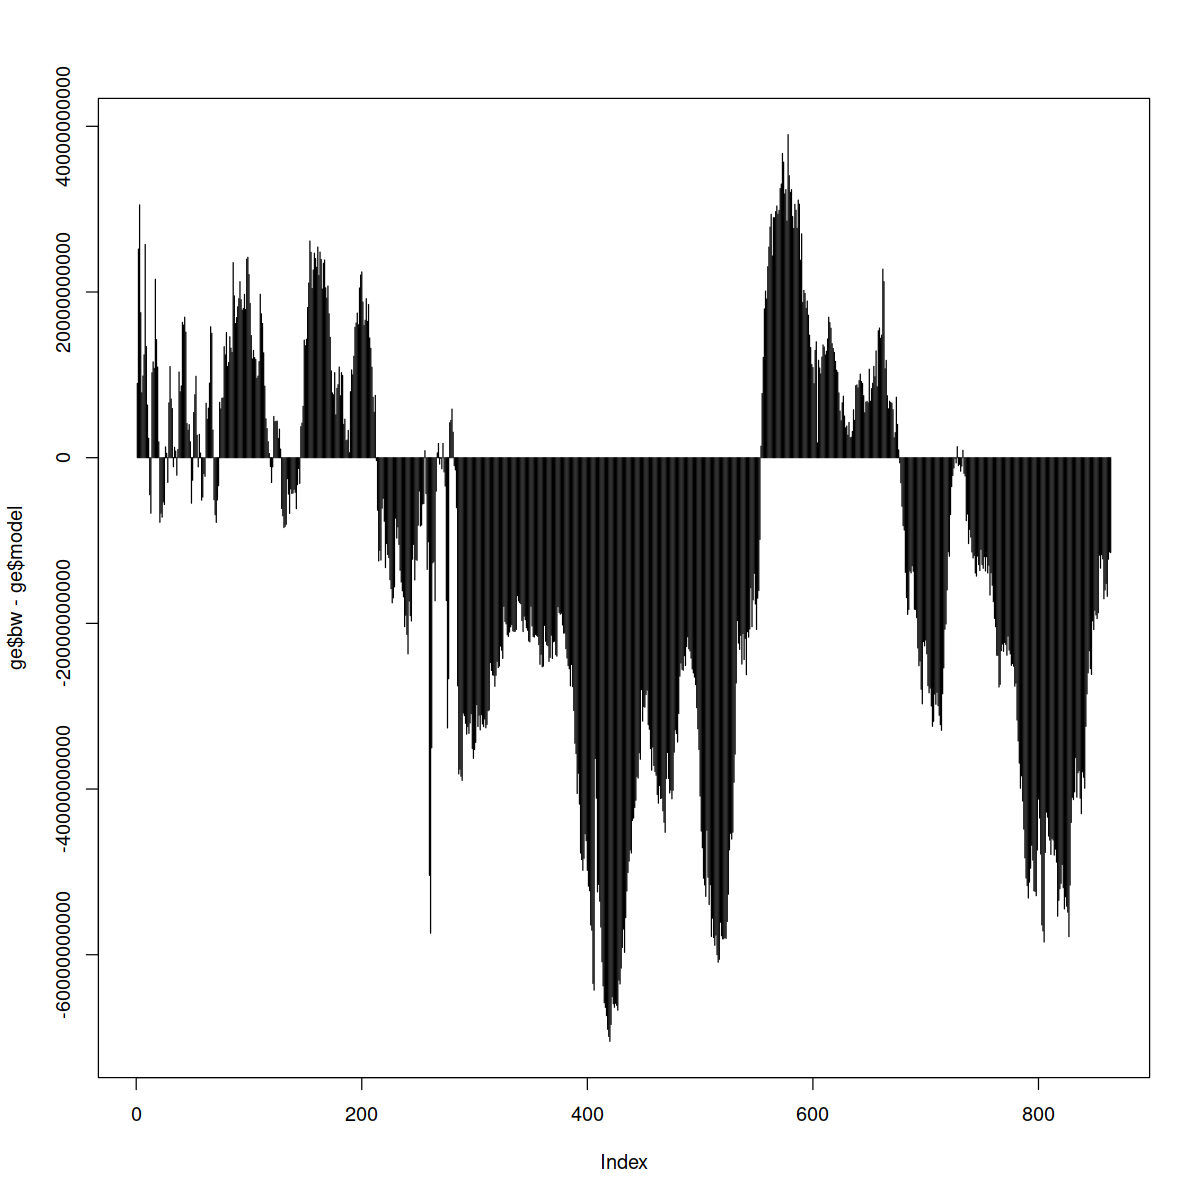

In [241]:
plot(ge$bw - ge$model, type="h")

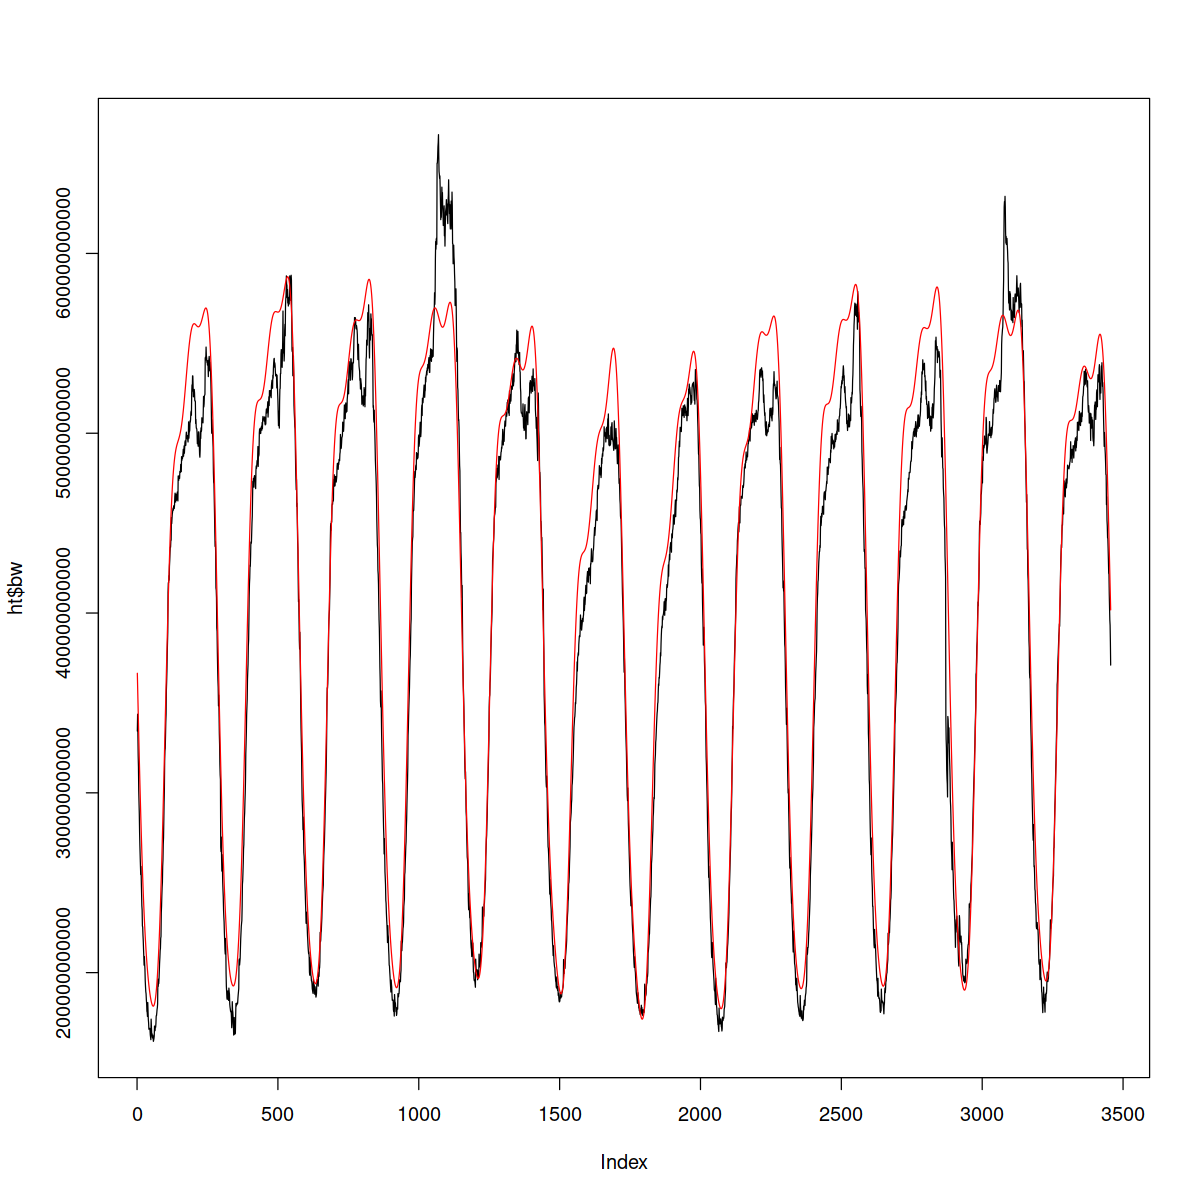

In [242]:
# half term.
ht <- x.fixed[x.fixed$date >= "2018-02-12" & x.fixed$date <= "2018-02-23", ]
plot(ht$bw, type="l")
lines(ht$model, col="red")

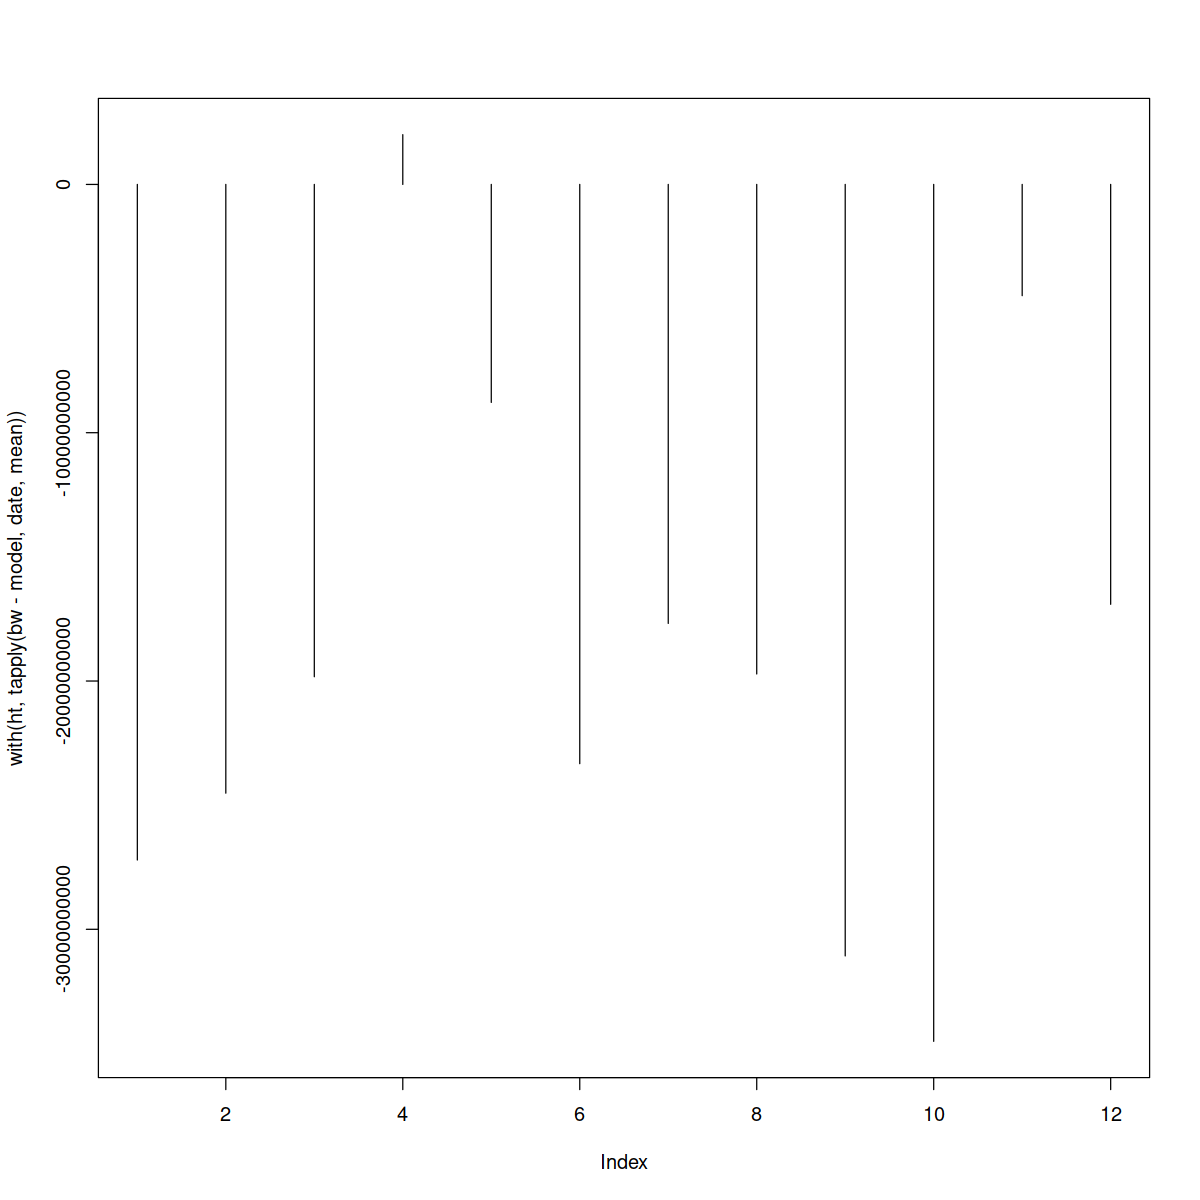

In [243]:
plot(with(ht, tapply(bw - model, date, mean)), type="h")

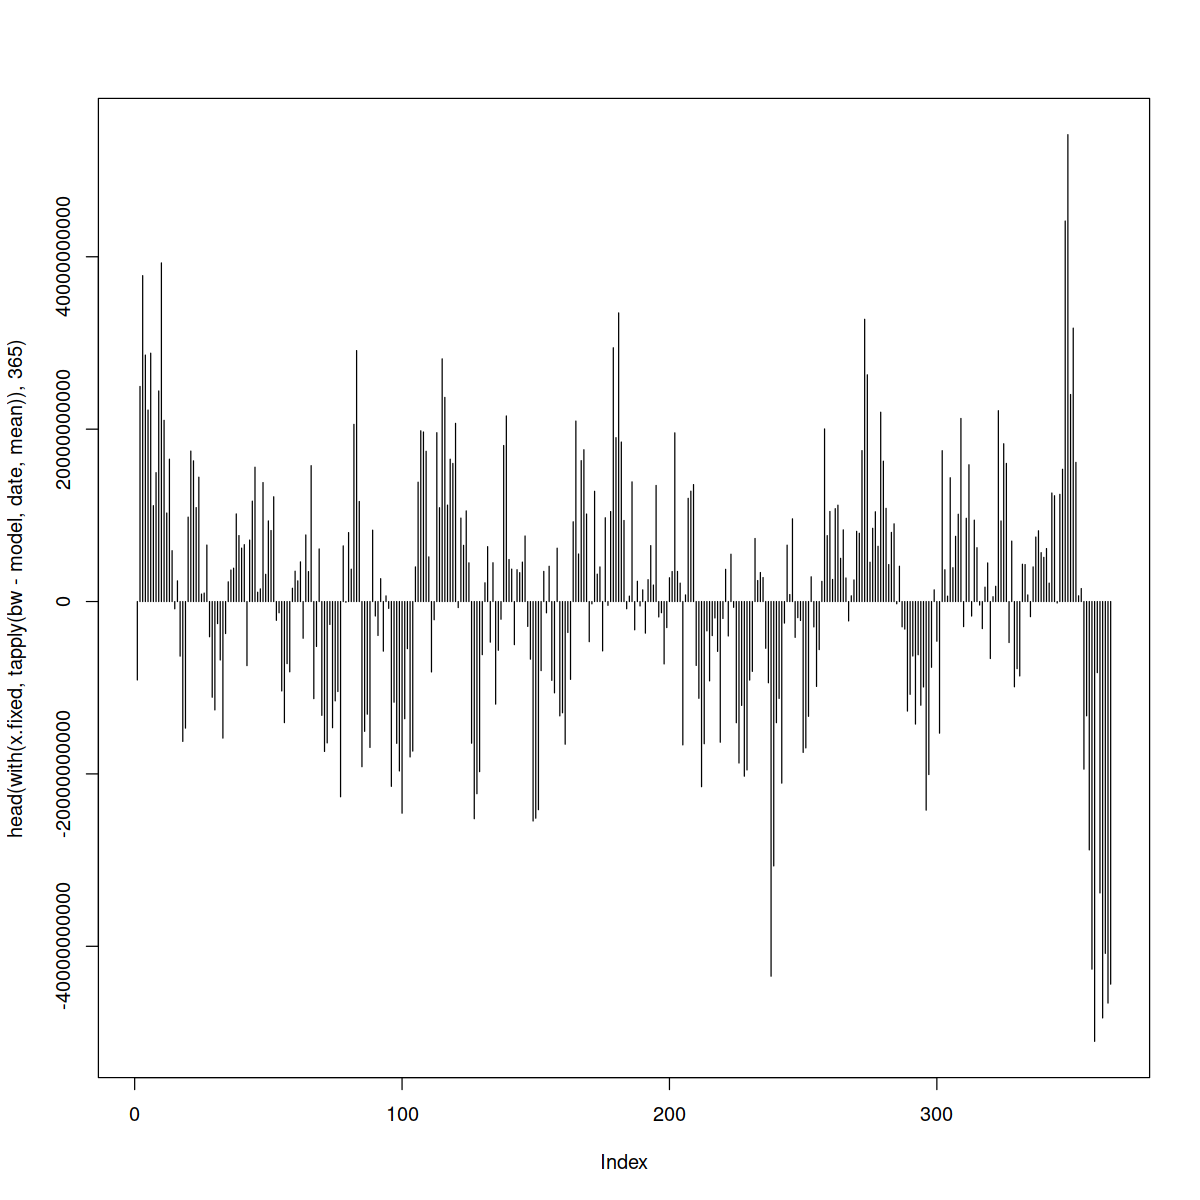

In [244]:
# 2016 mean daily residuals
plot(head(with(x.fixed, tapply(bw-model, date, mean)), 365), type="h")

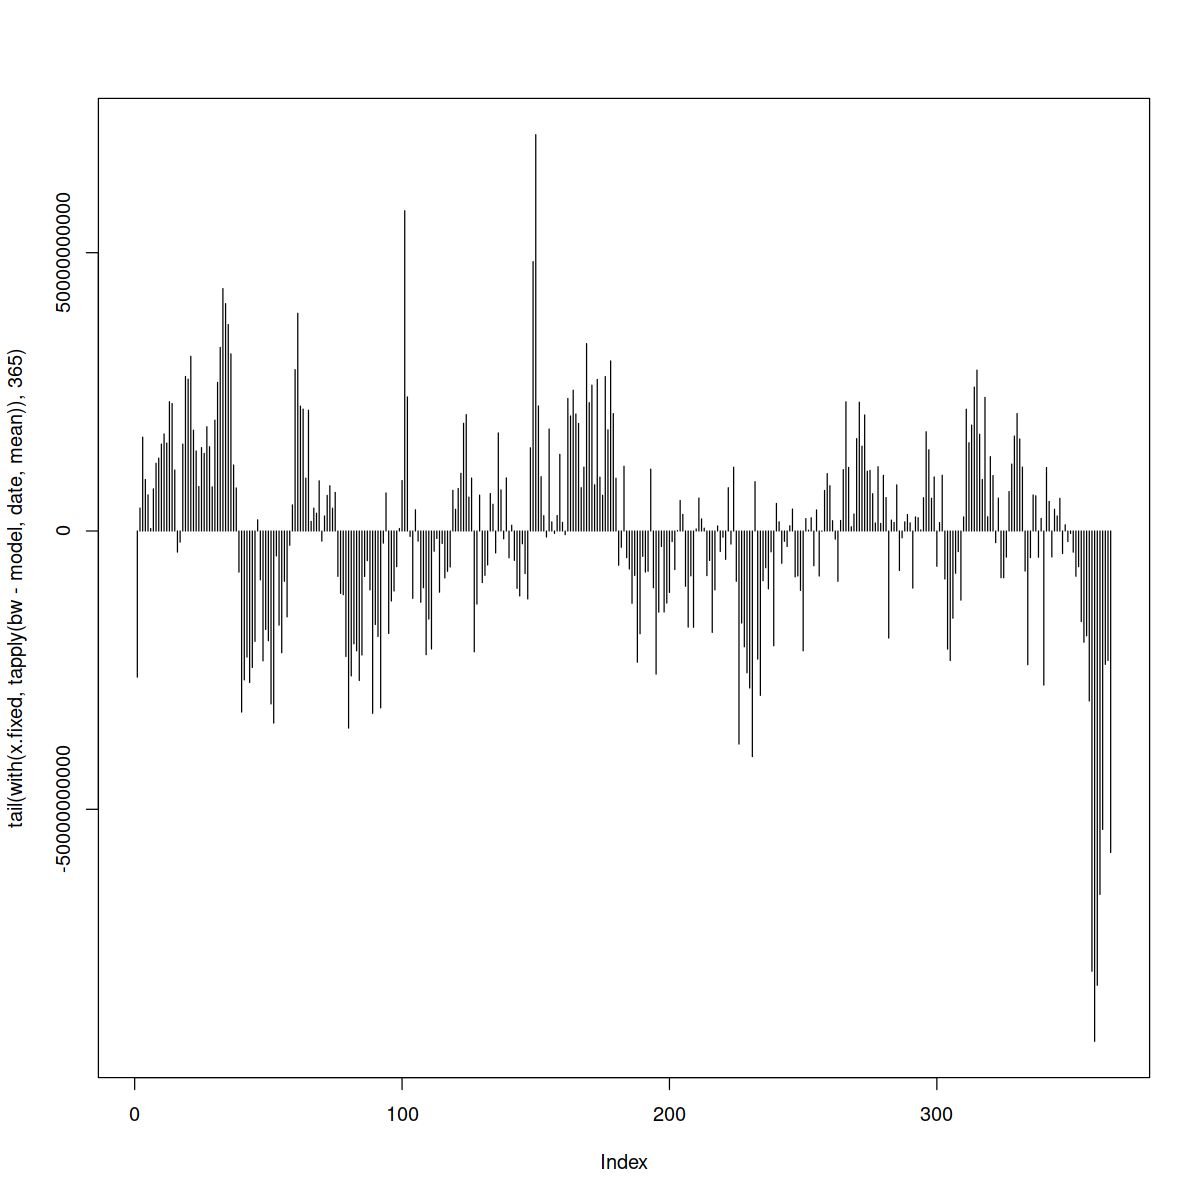

In [245]:
# 2018 mean daily residuals
plot(tail(with(x.fixed, tapply(bw-model, date, mean)), 365), type="h")

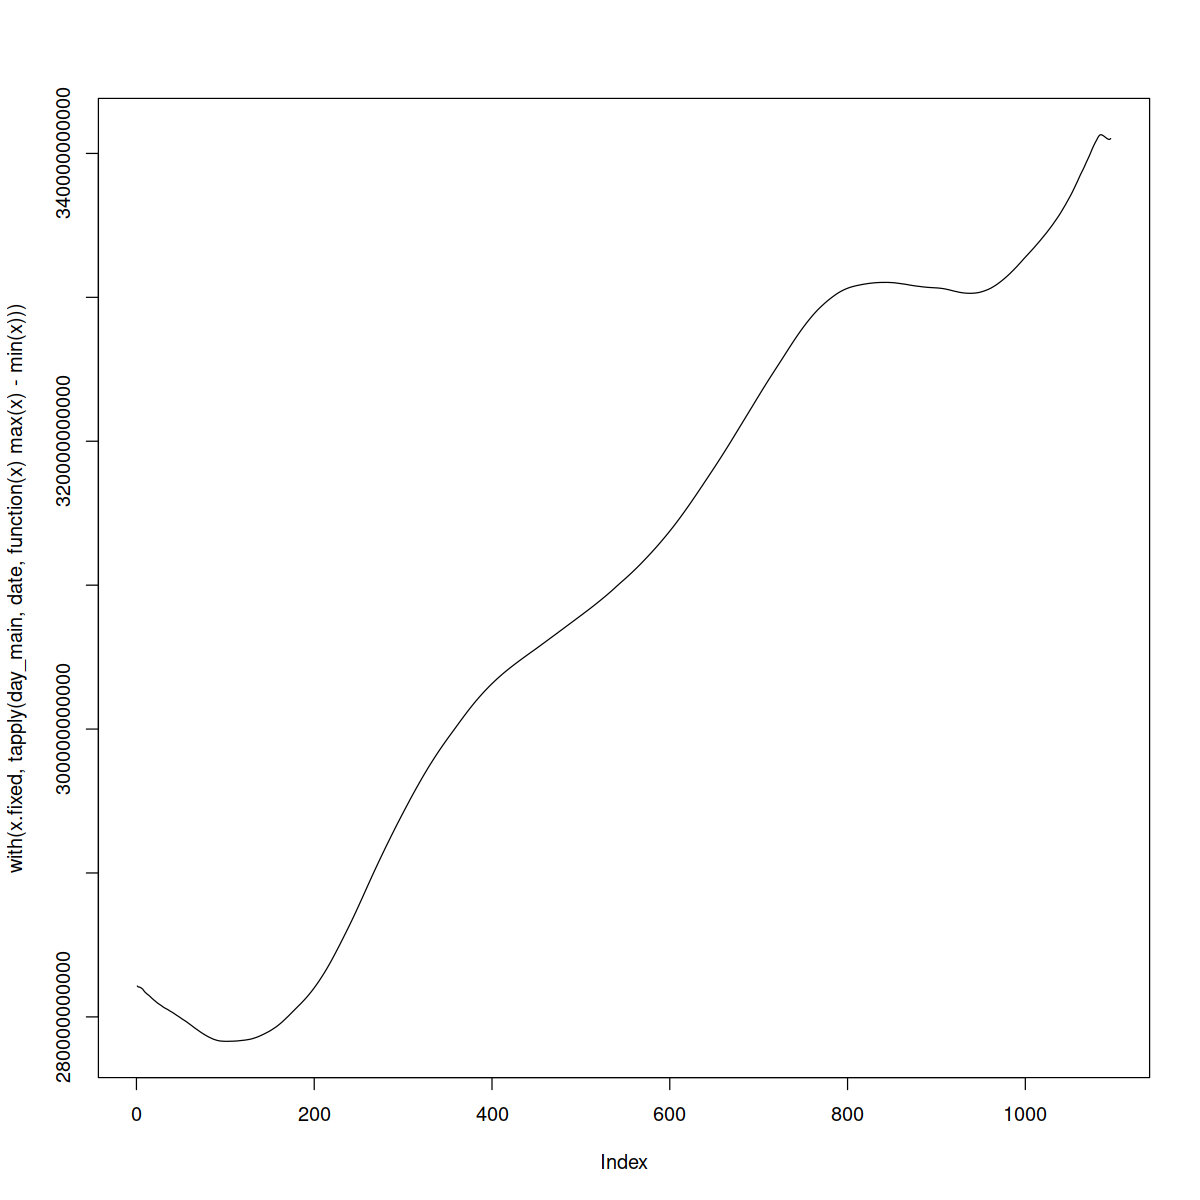

In [246]:
# daily peak to peak range of main daily cycle componeint.
# this is amplitude modulated - could possibly be an indicator of human partipation
# rise of the machines? (or indicator that this is multiplicative?) :/
plot(with(x.fixed, tapply(day_main, date, function(x) max(x) - min(x))), type="l")

In [247]:
# here's an interesting one: moving lag-1 autocorellation on the first differences of the seasonally adjusted bw.
# window length = 1 week, stride = 1 day.
# a measure of human participation? - idea is that signal (rise and fall of sun)
# becomes weaker when humans not partcipating...
# todo: look at -ve signs - this might be holidays....
roll.window <- rollapply(x.fixed$sa, width=288*7, by=288, function(x) {
    tail(acf(diff(x), lag.max=1, plot=F)[[1]], 1)
}, align="left")

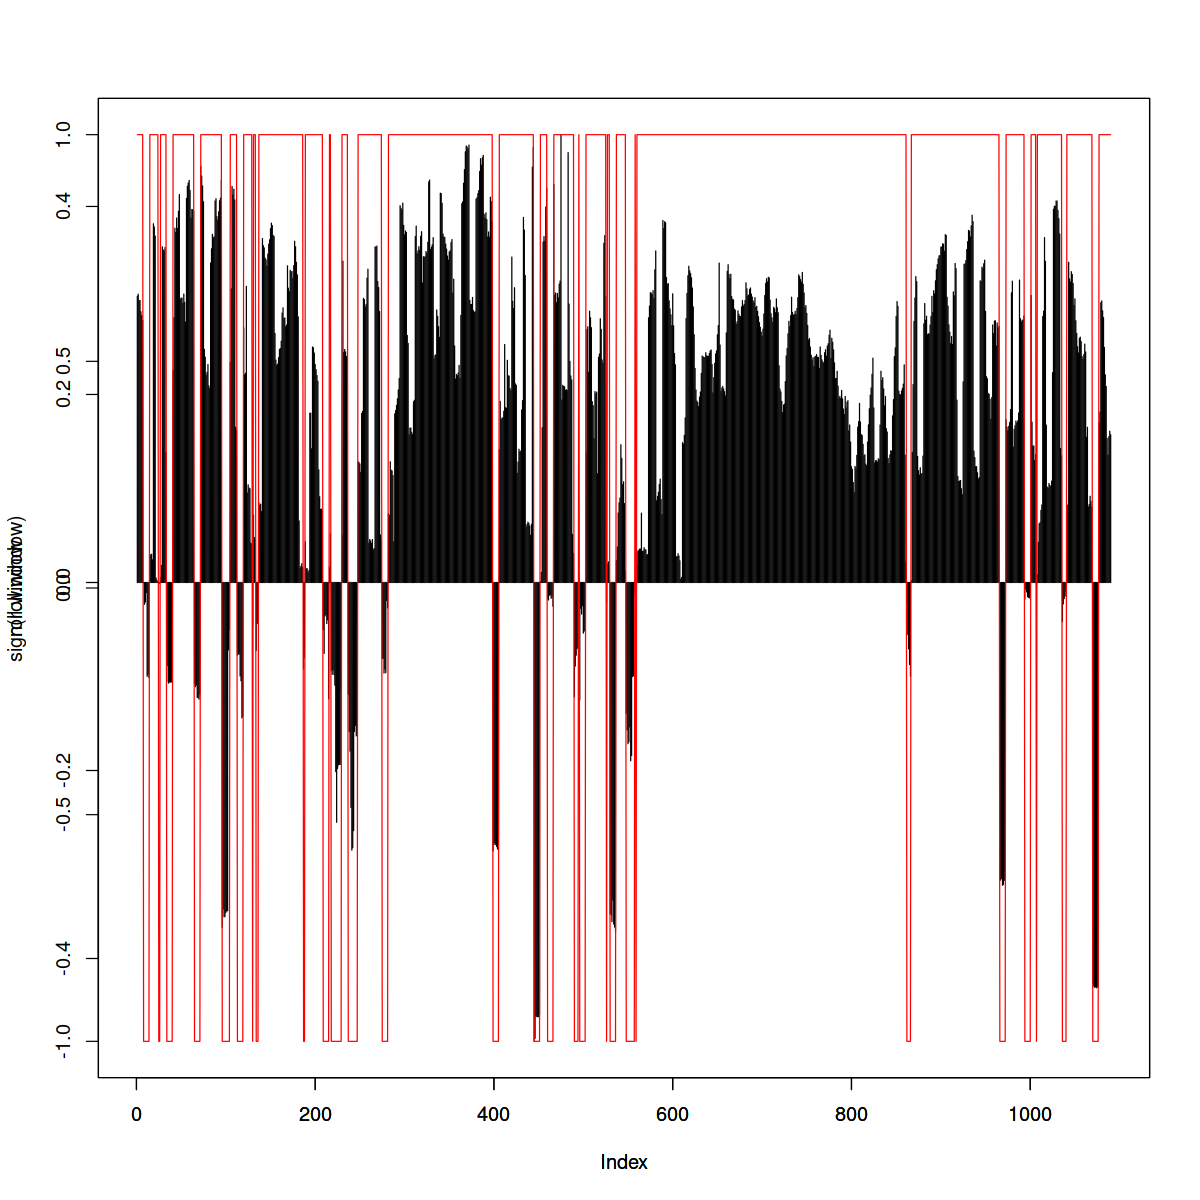

In [248]:
plot(roll.window, type="h")
par(new=T)
plot(sign(roll.window), type="l", col="red")